### **Histogramas para visualização de atributos categóricos**

O que mostram: quantidade de instâncias por opção de resposta; dessa quantidade total de instâncias, quantas são da classe 1 e quantas são da classe 2.

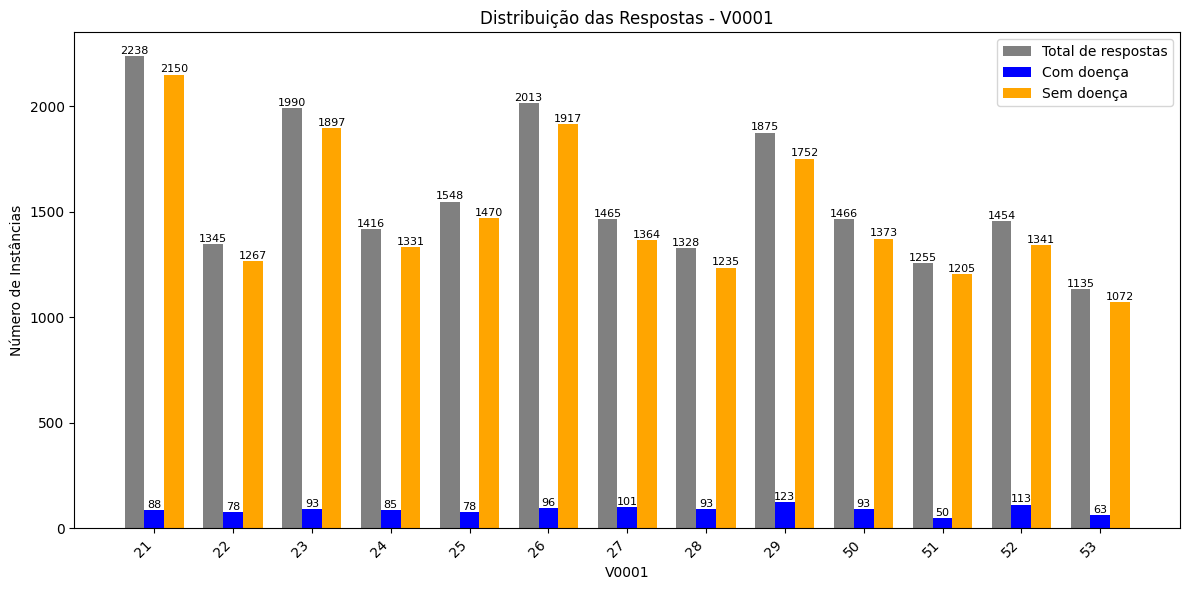

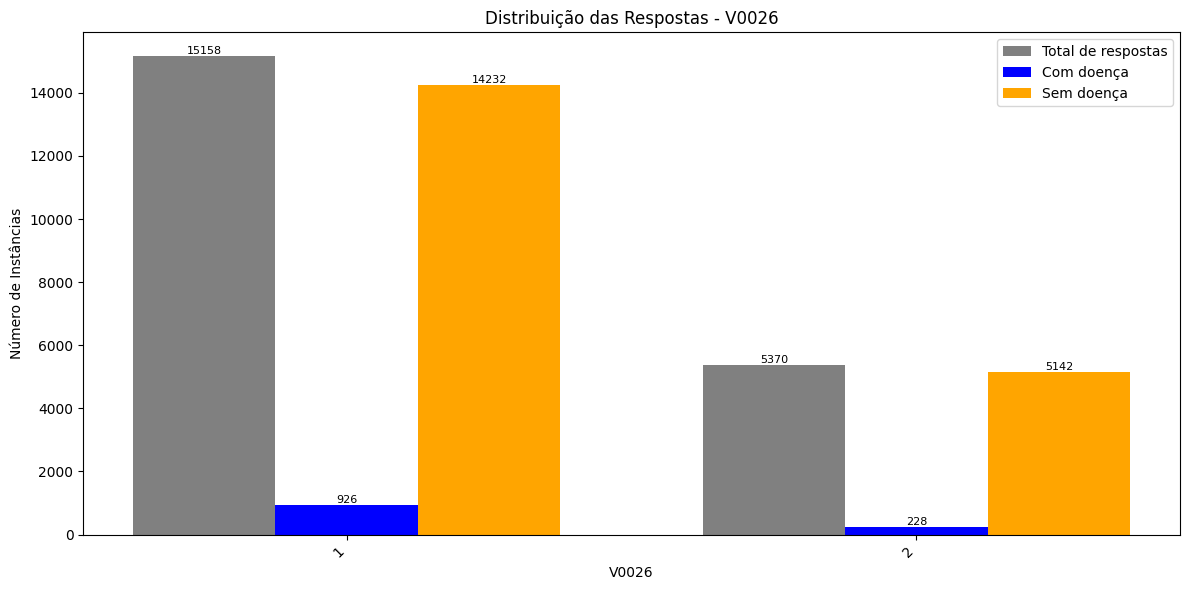

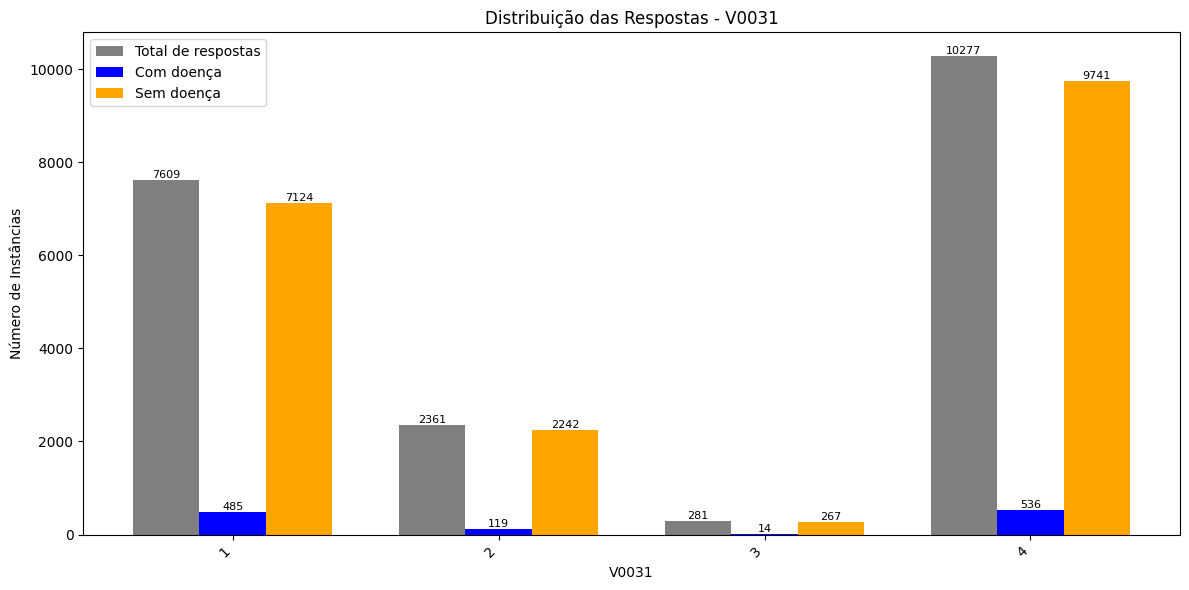

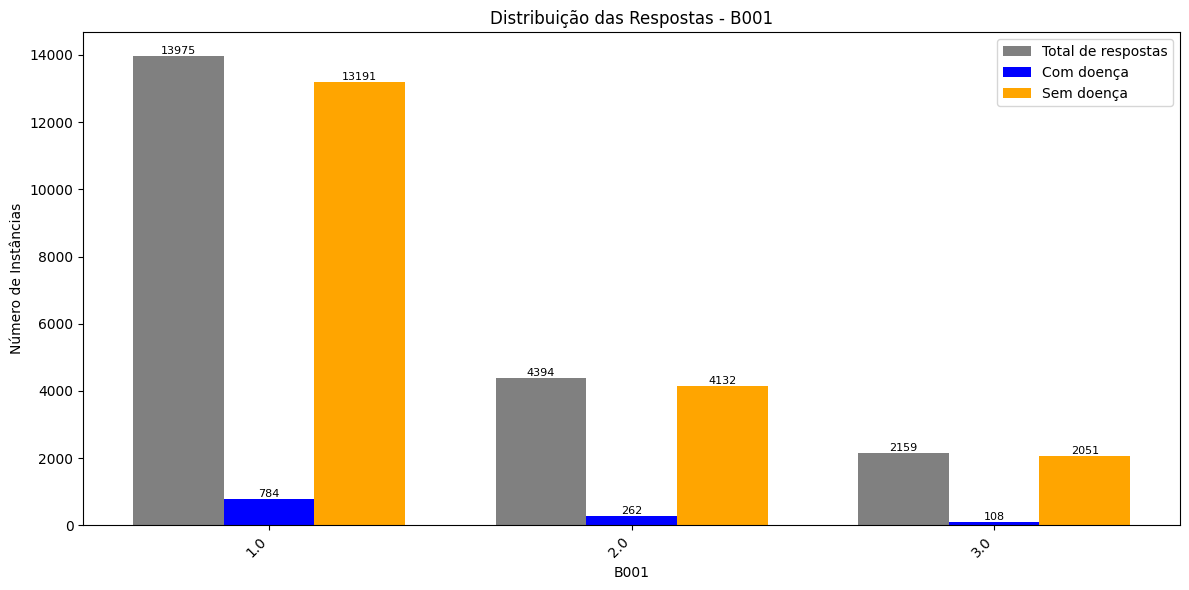

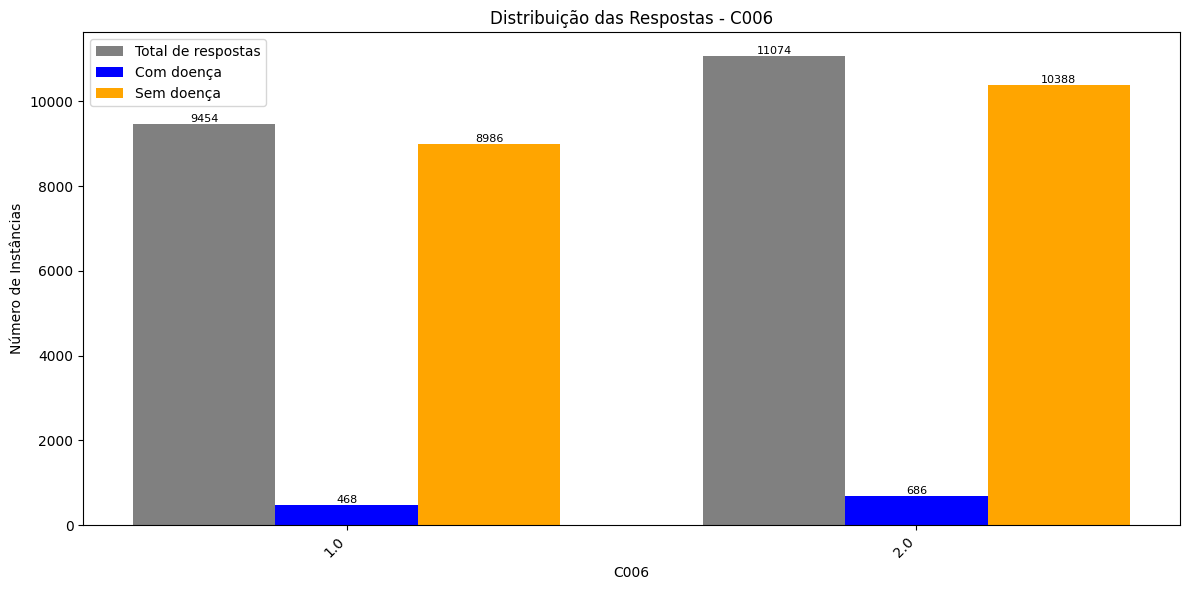

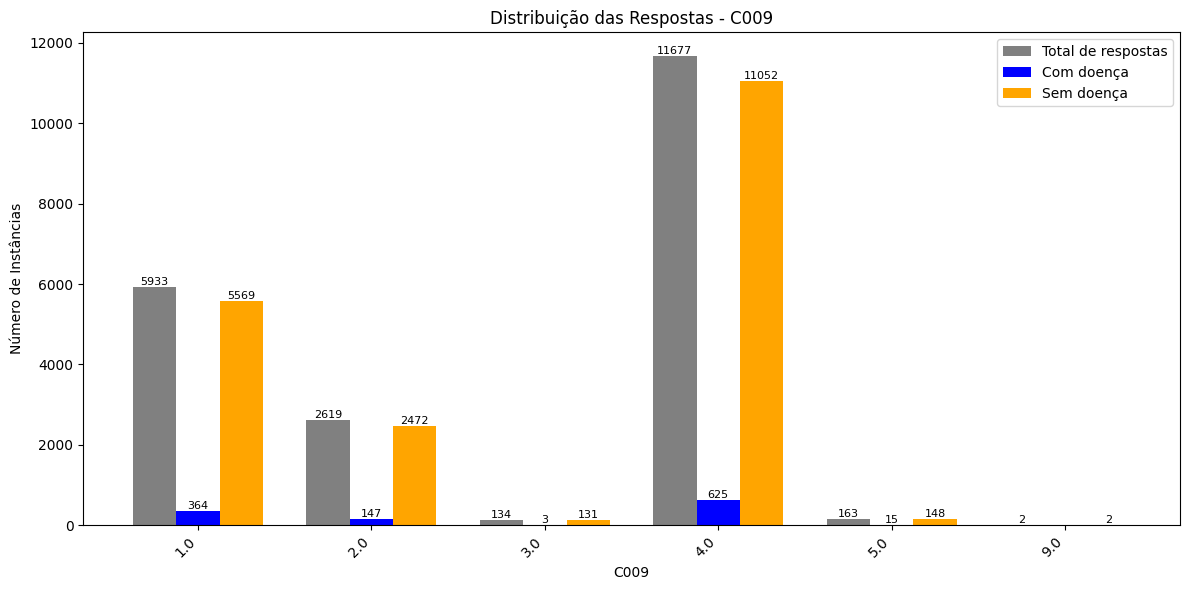

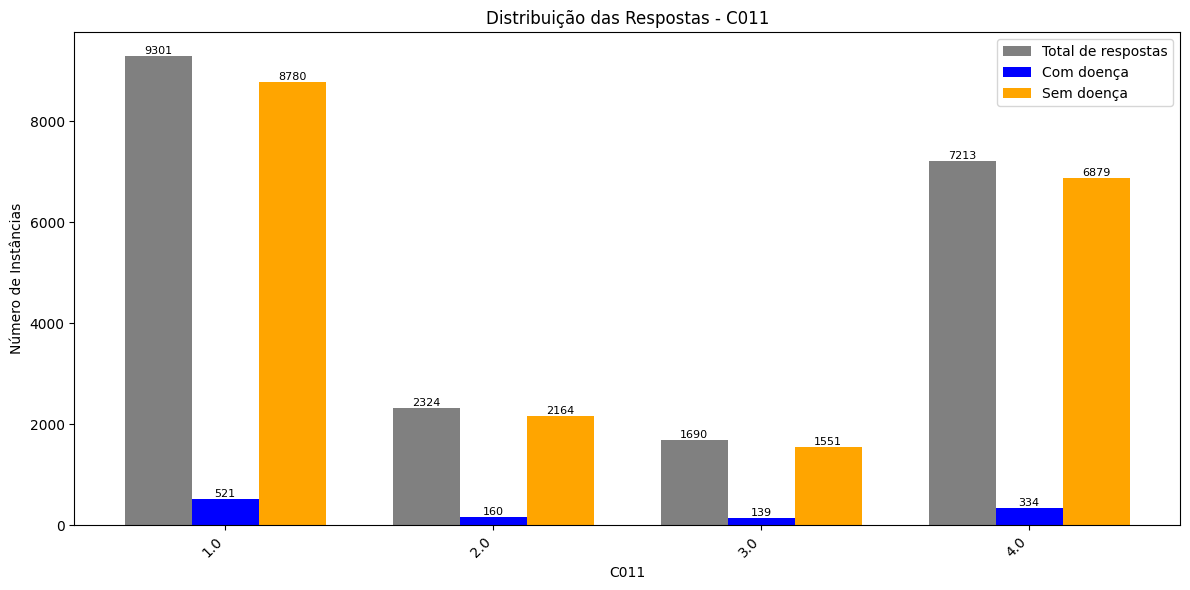

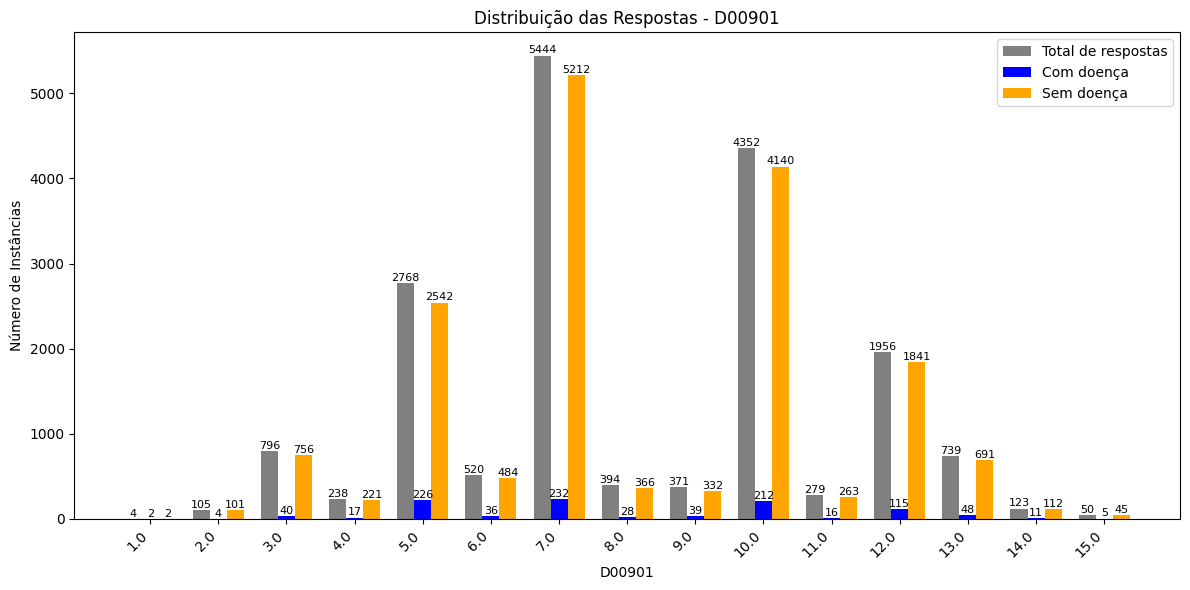

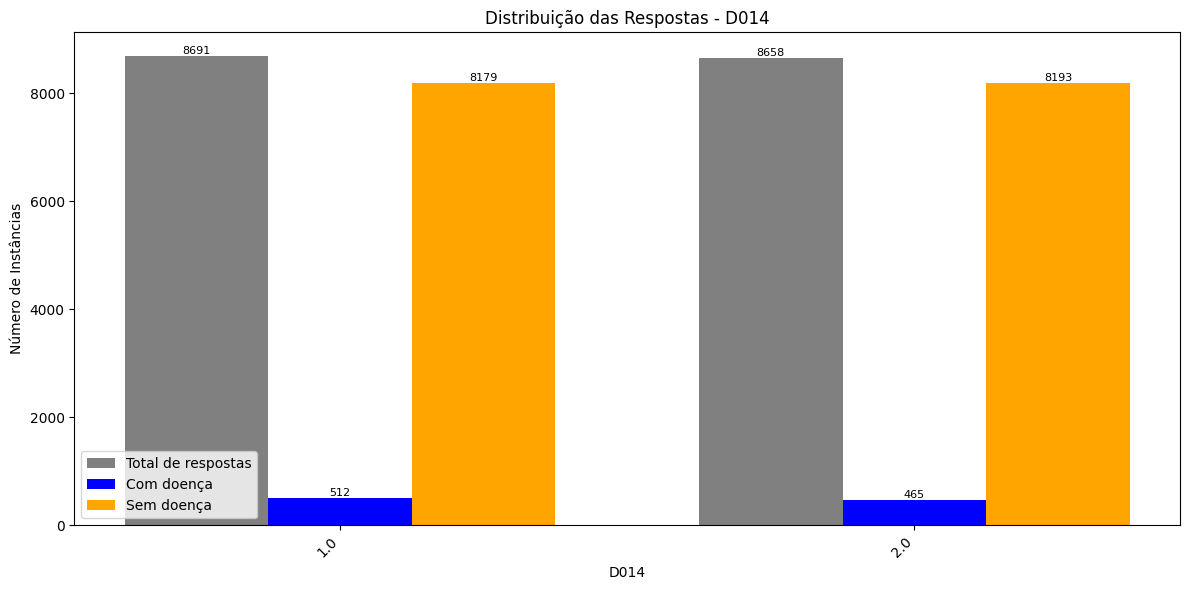

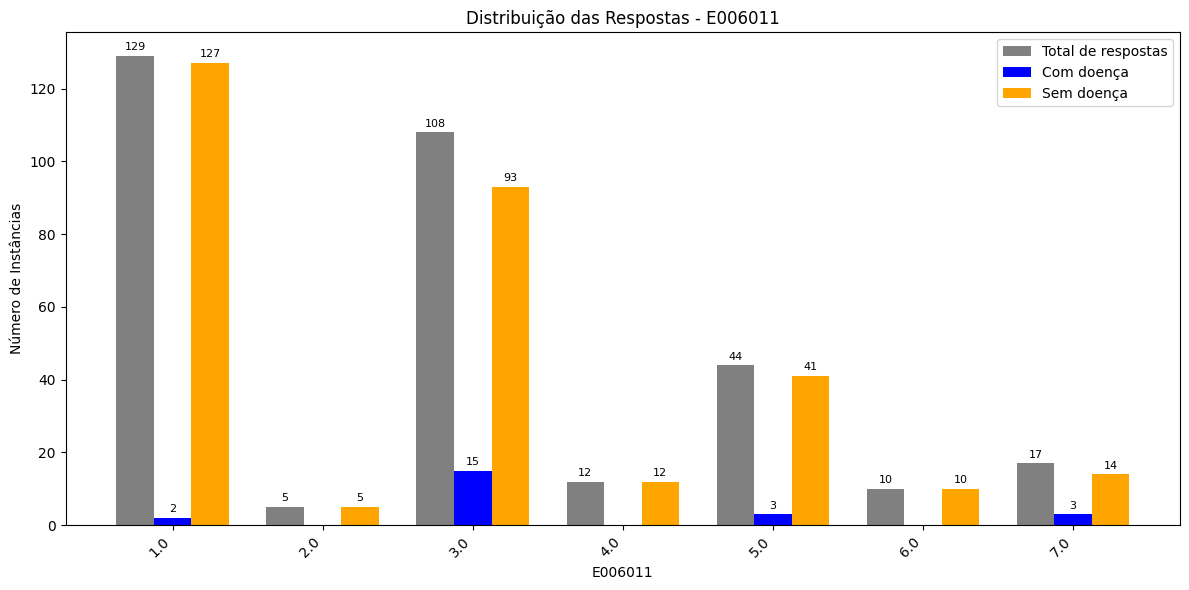

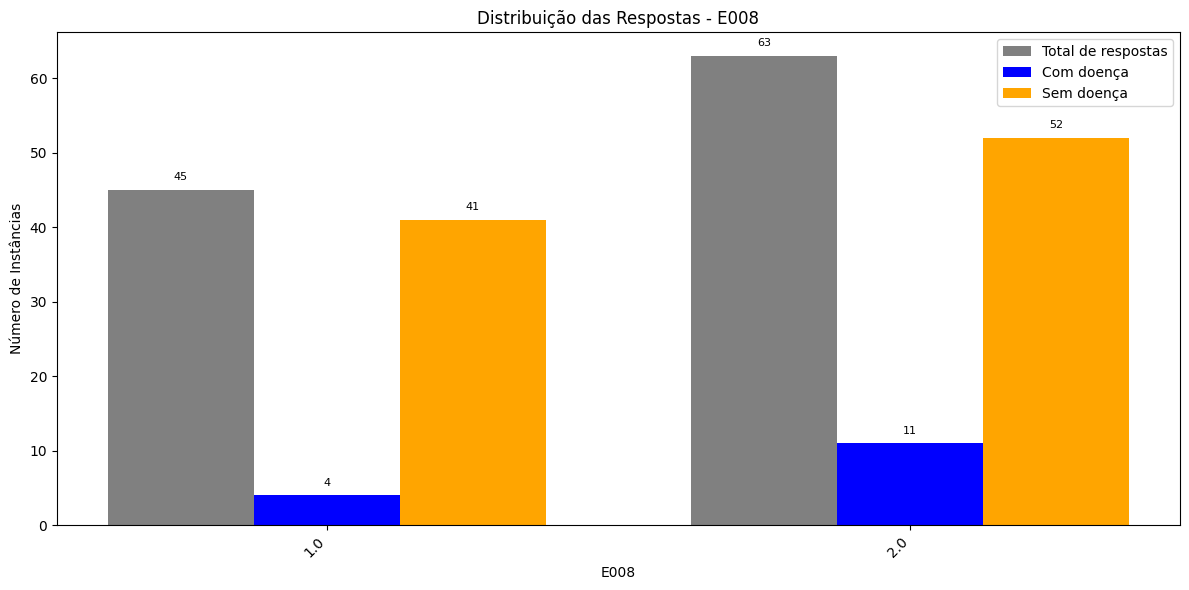

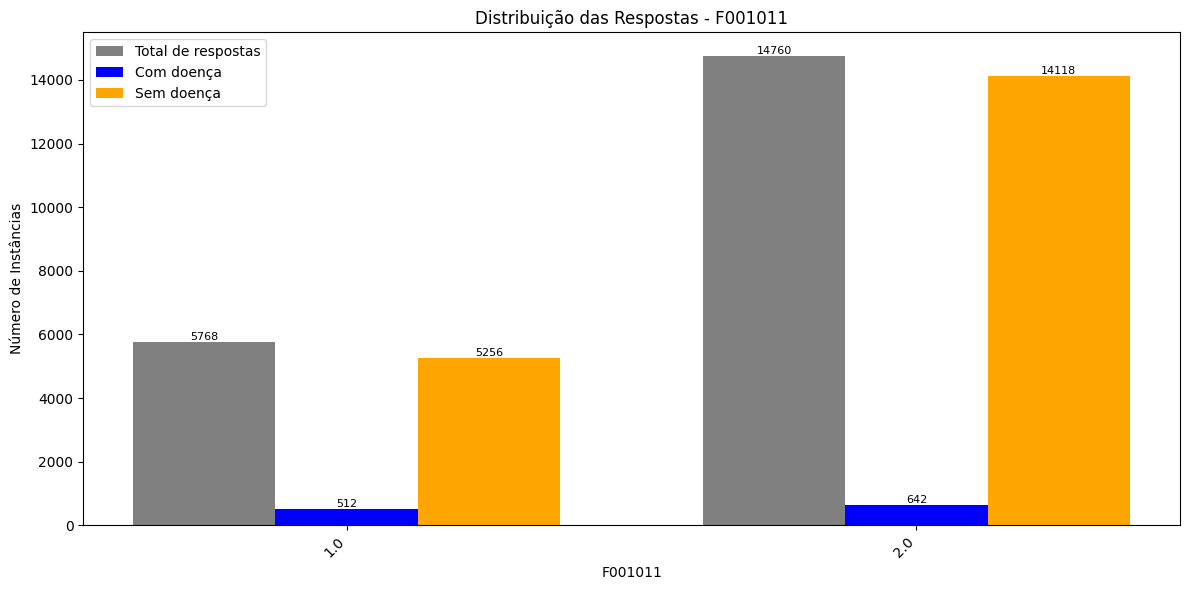

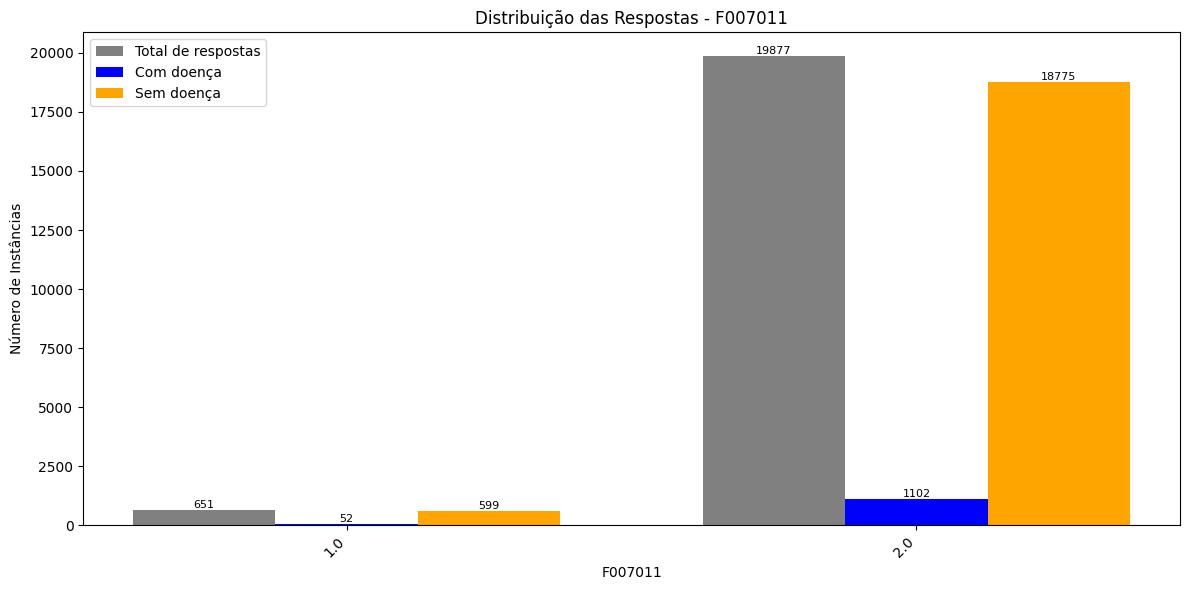

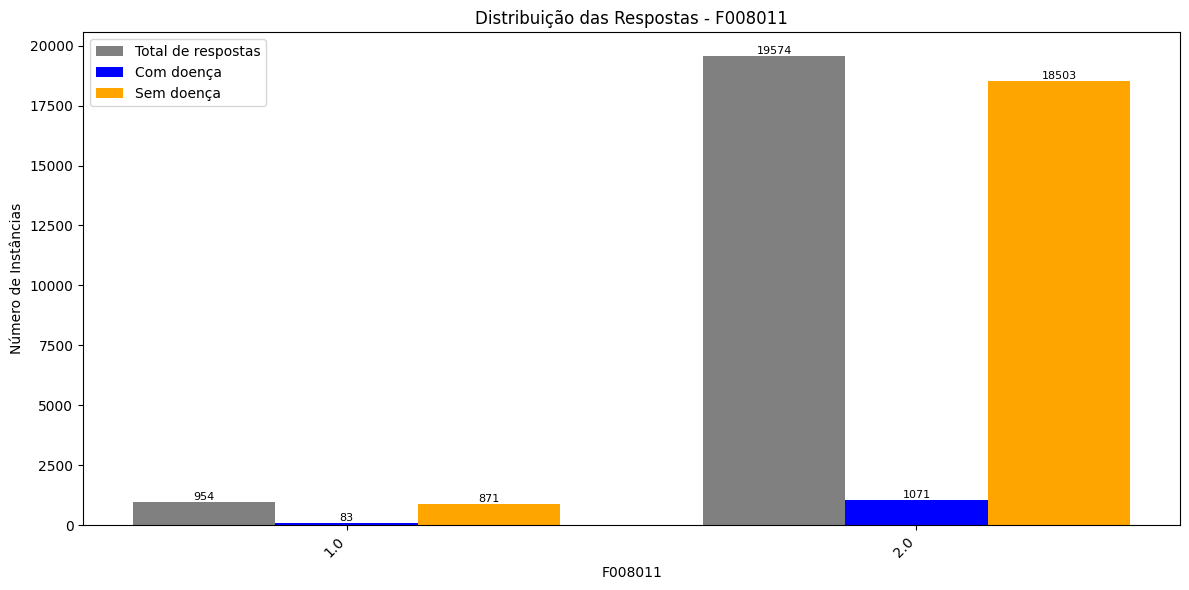

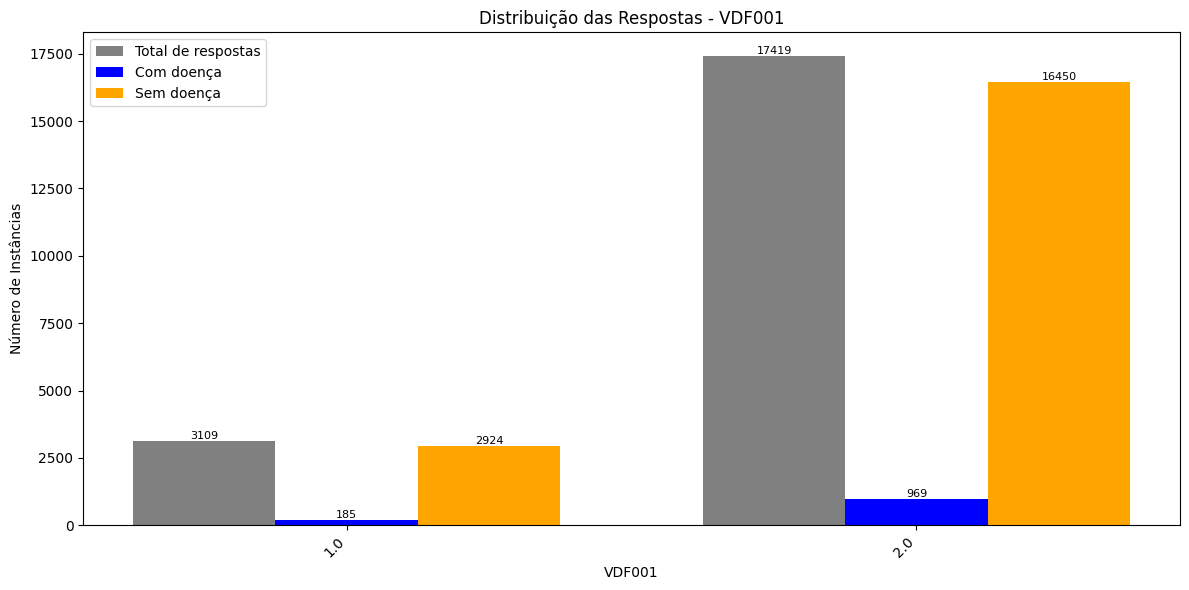

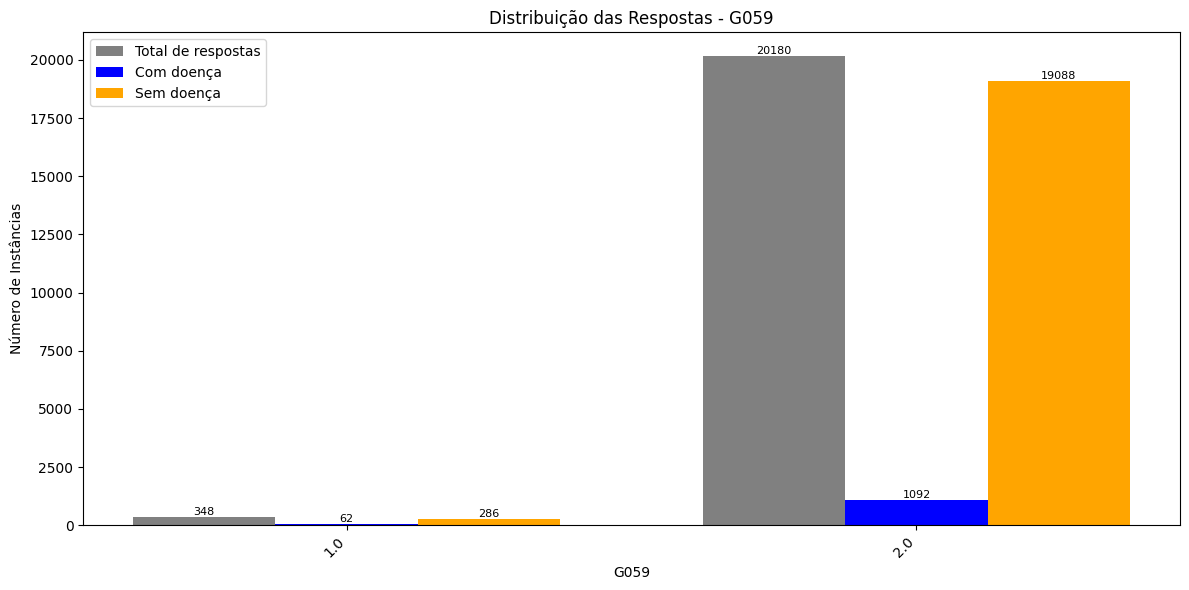

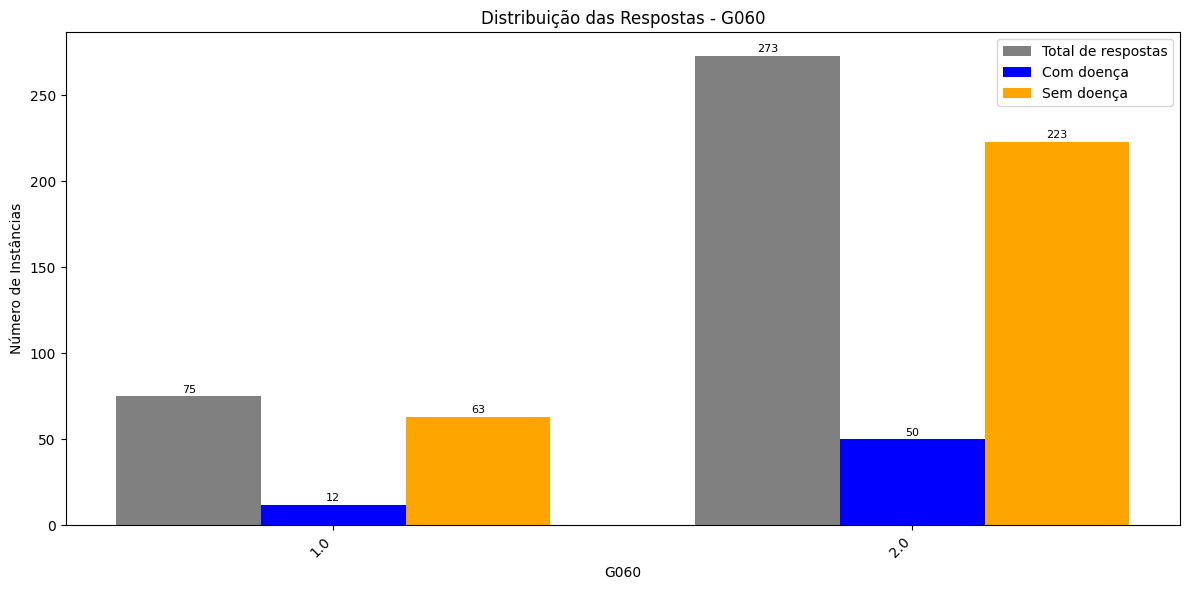

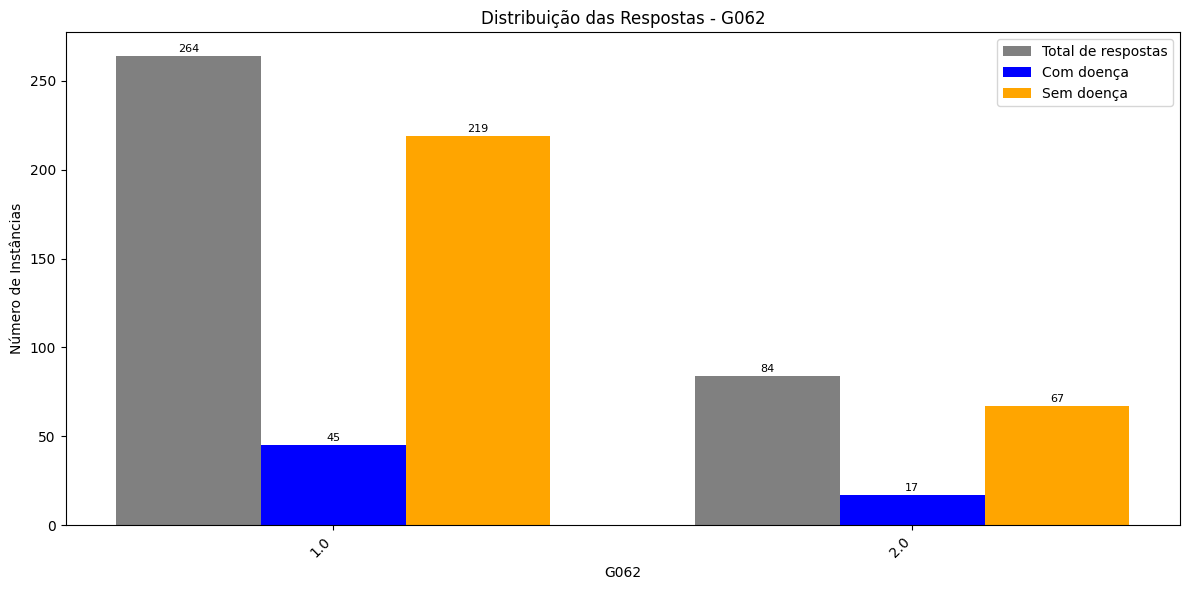

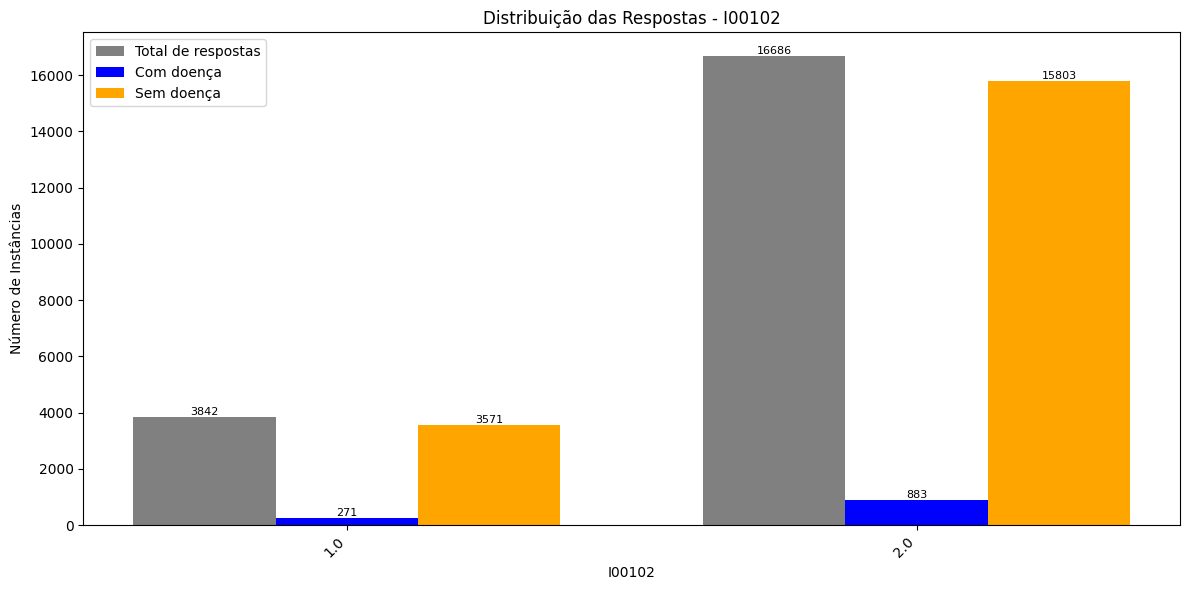

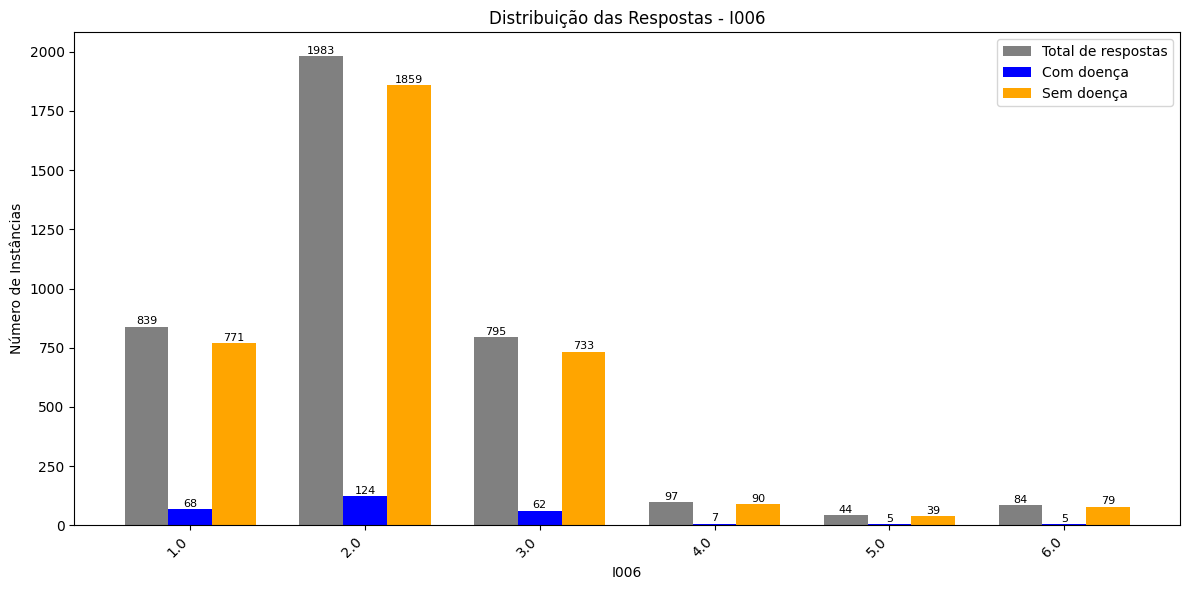

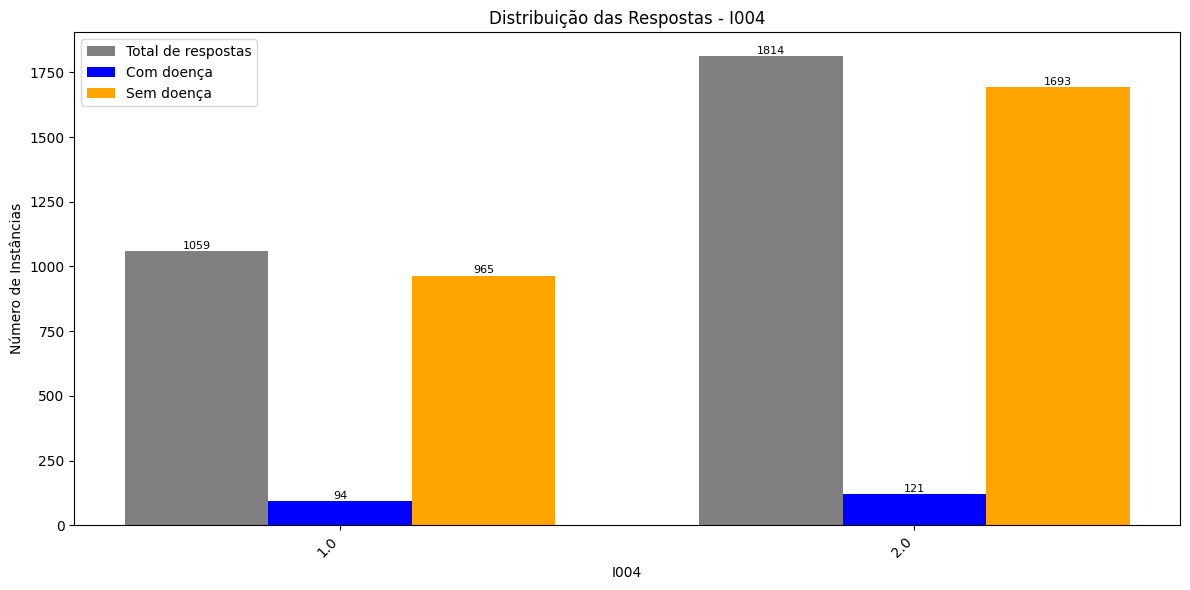

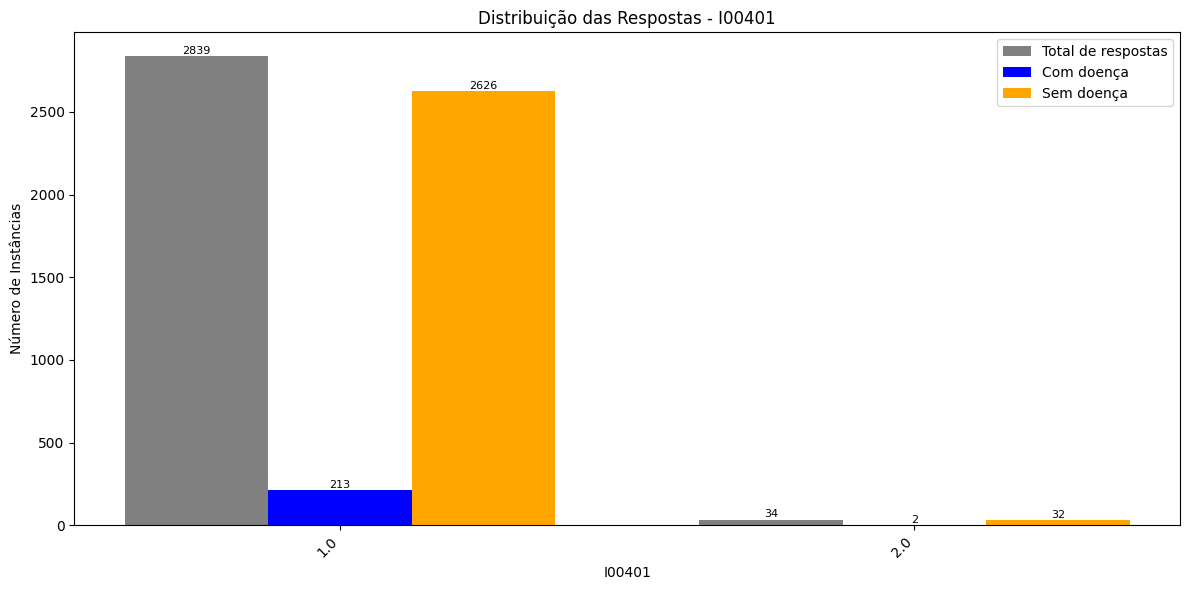

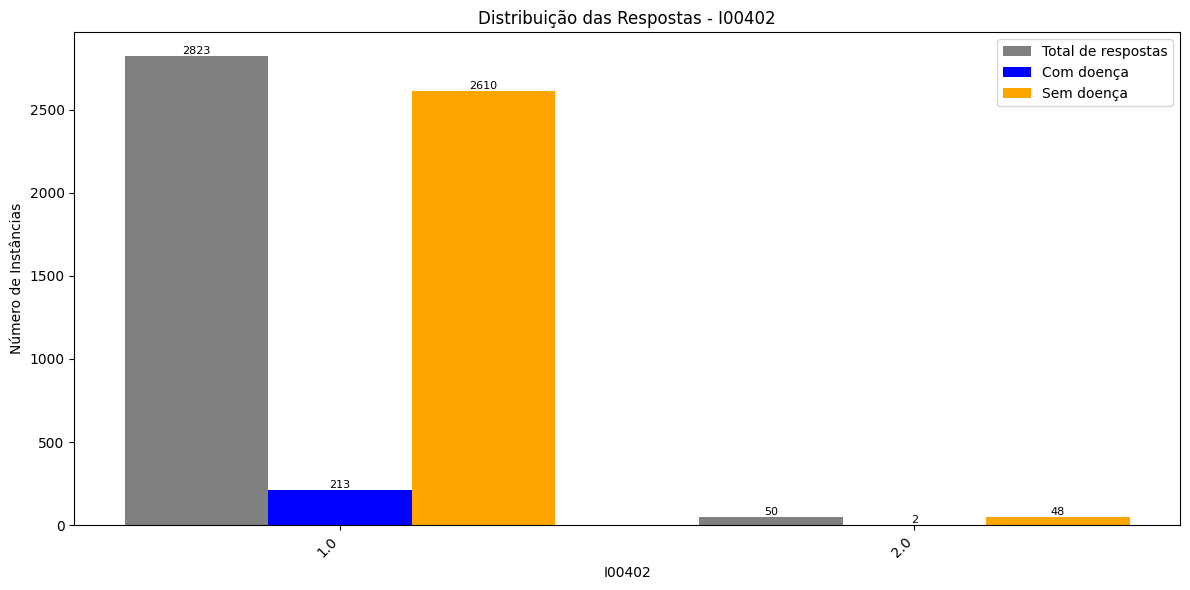

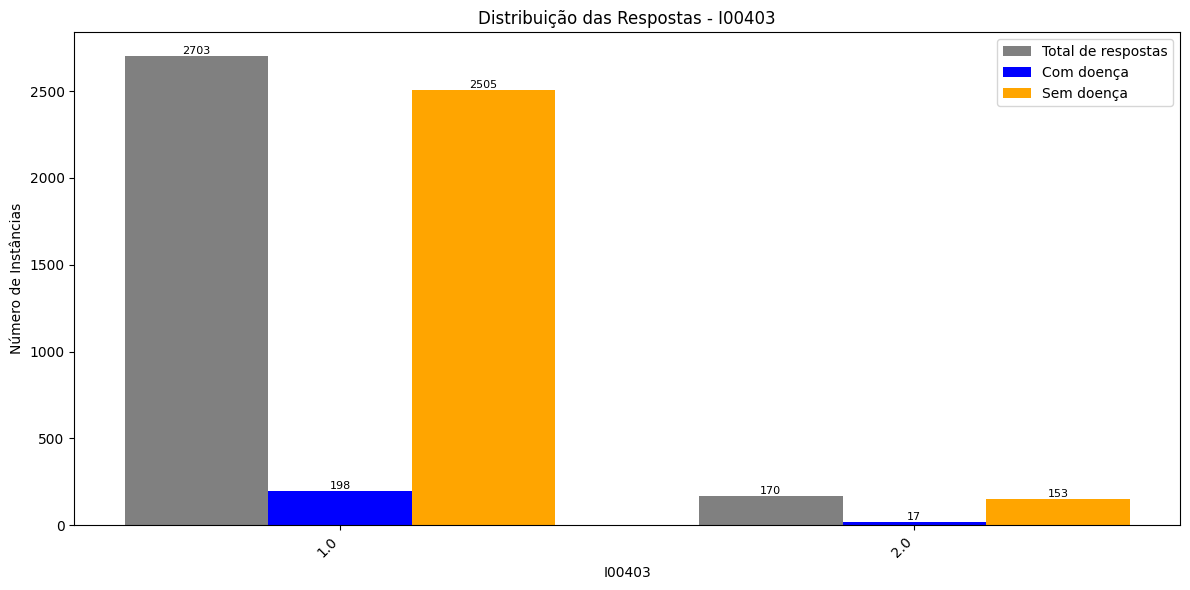

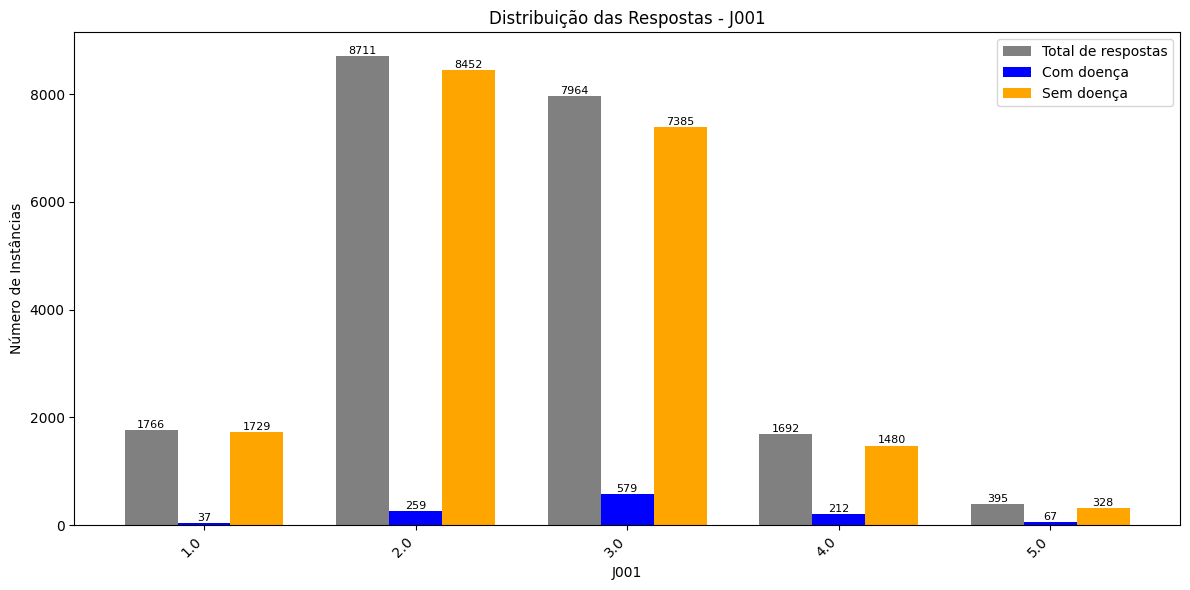

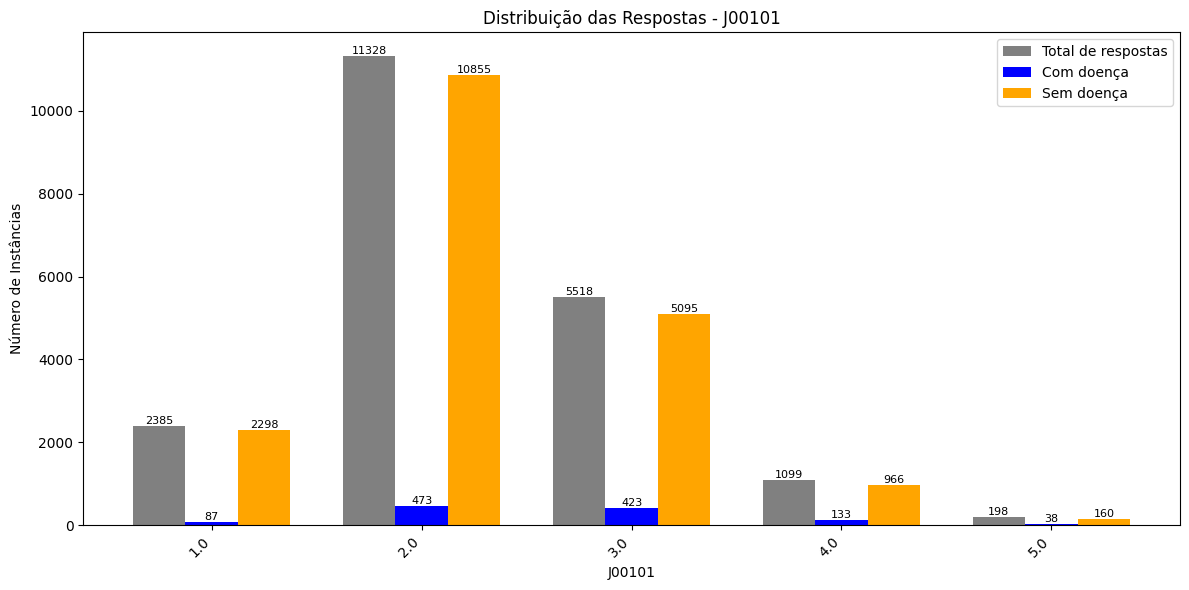

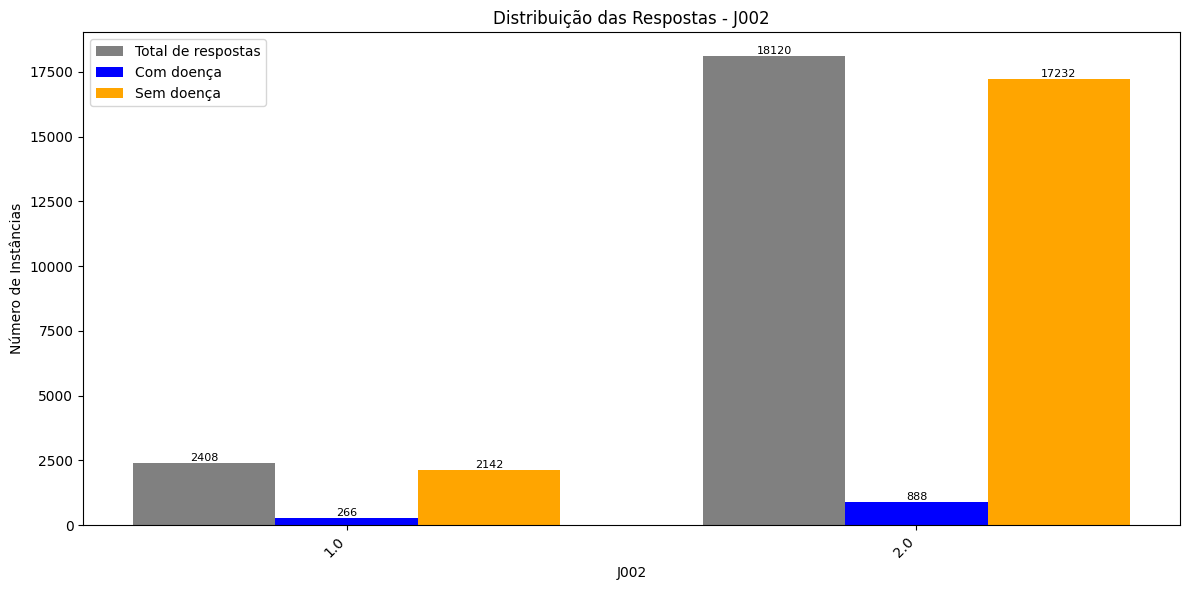

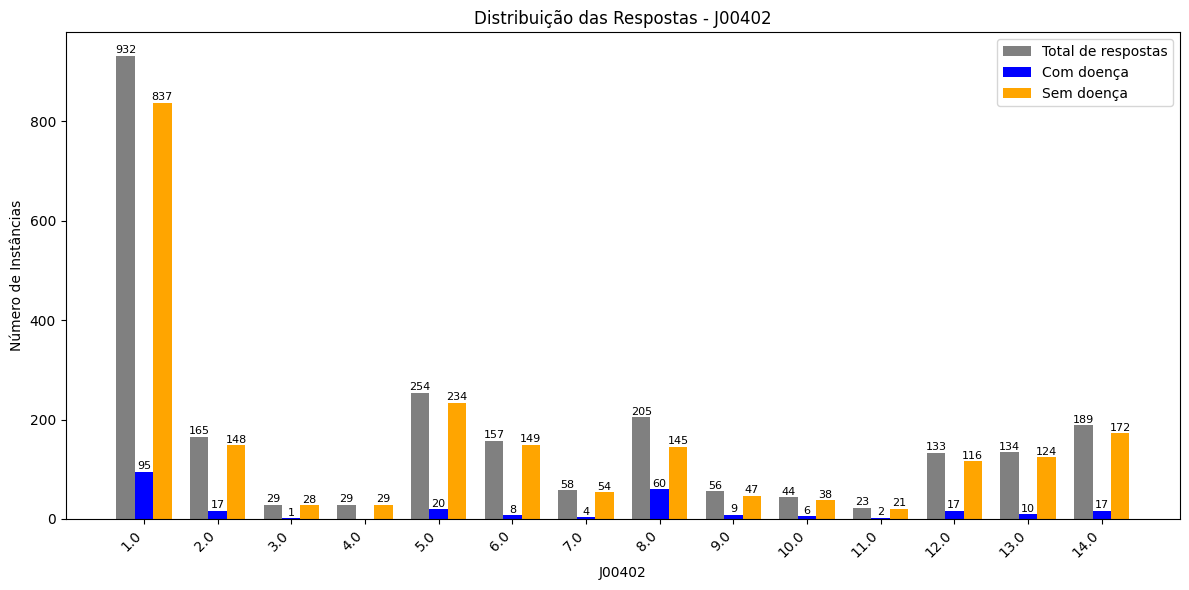

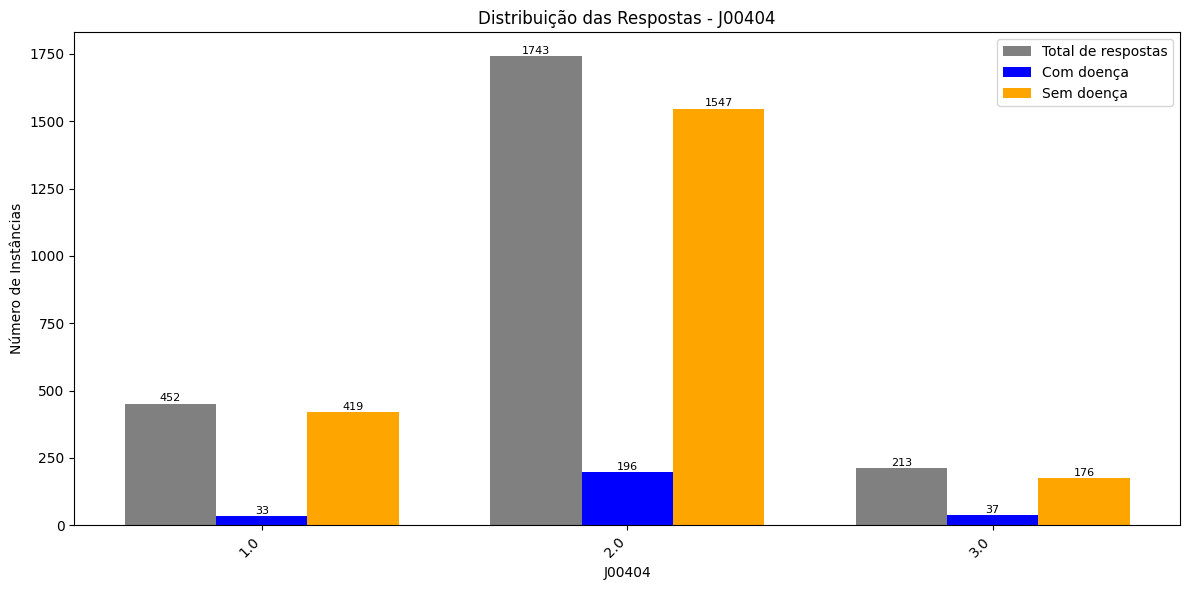

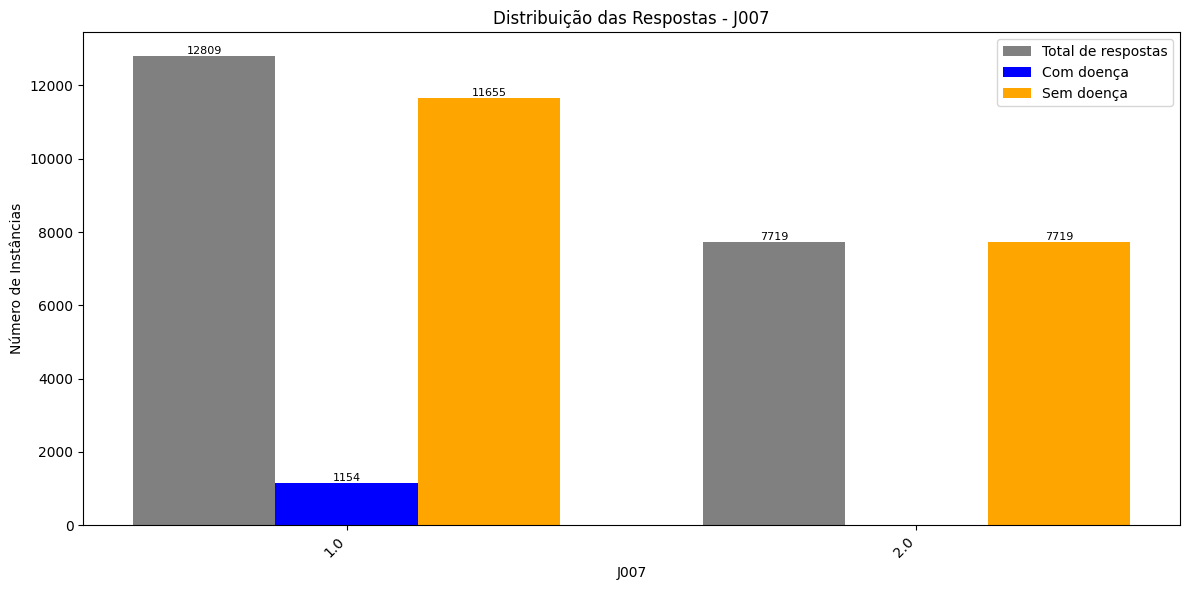

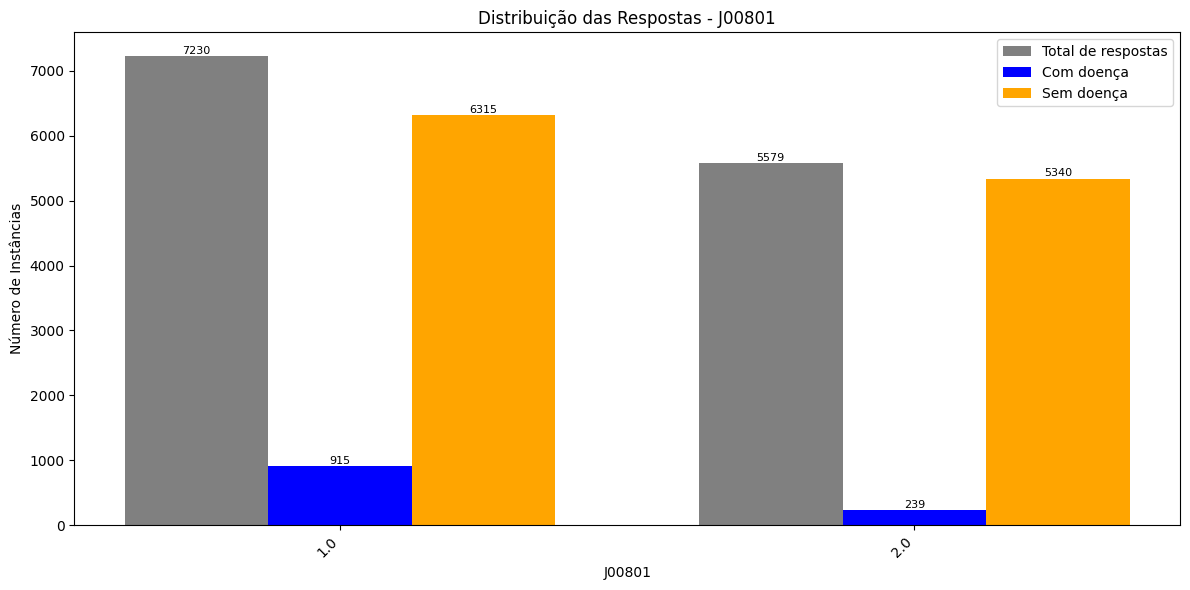

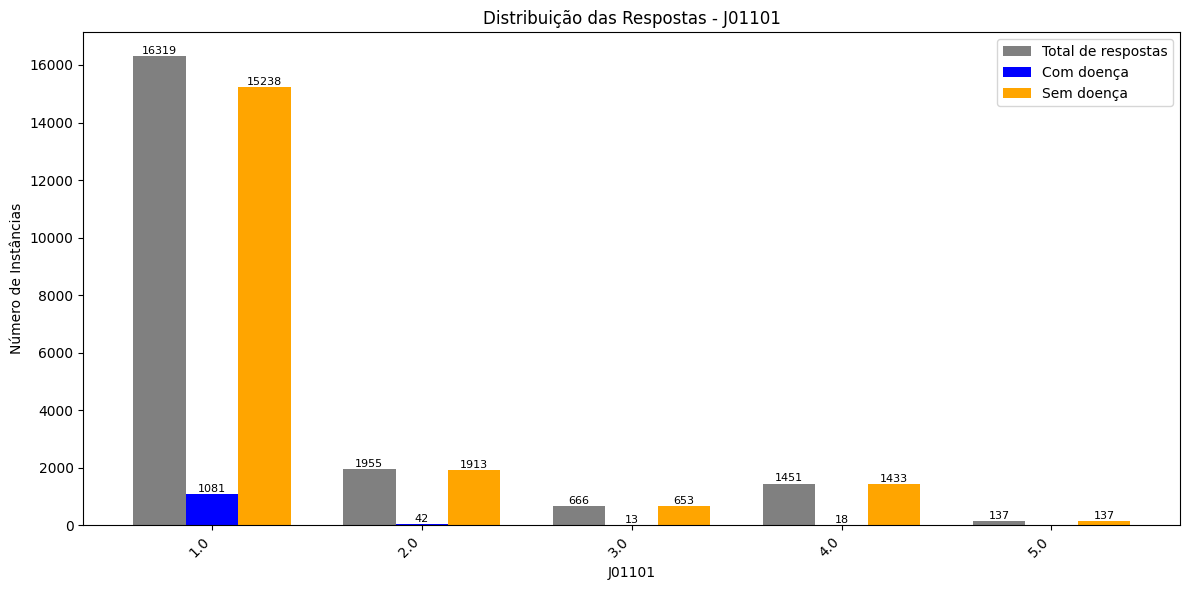

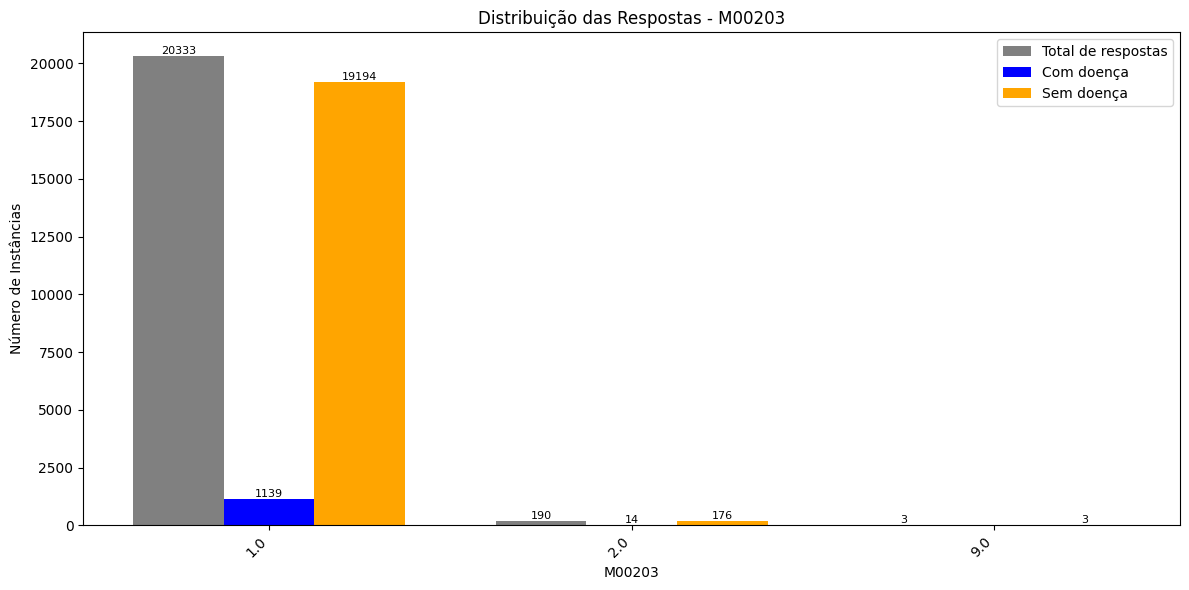

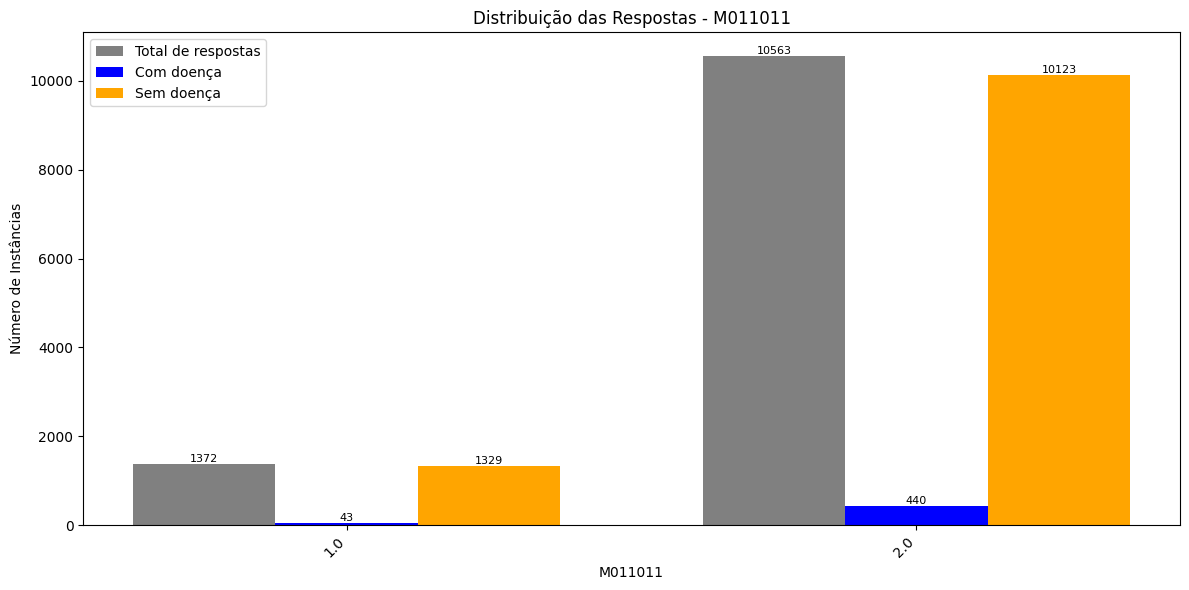

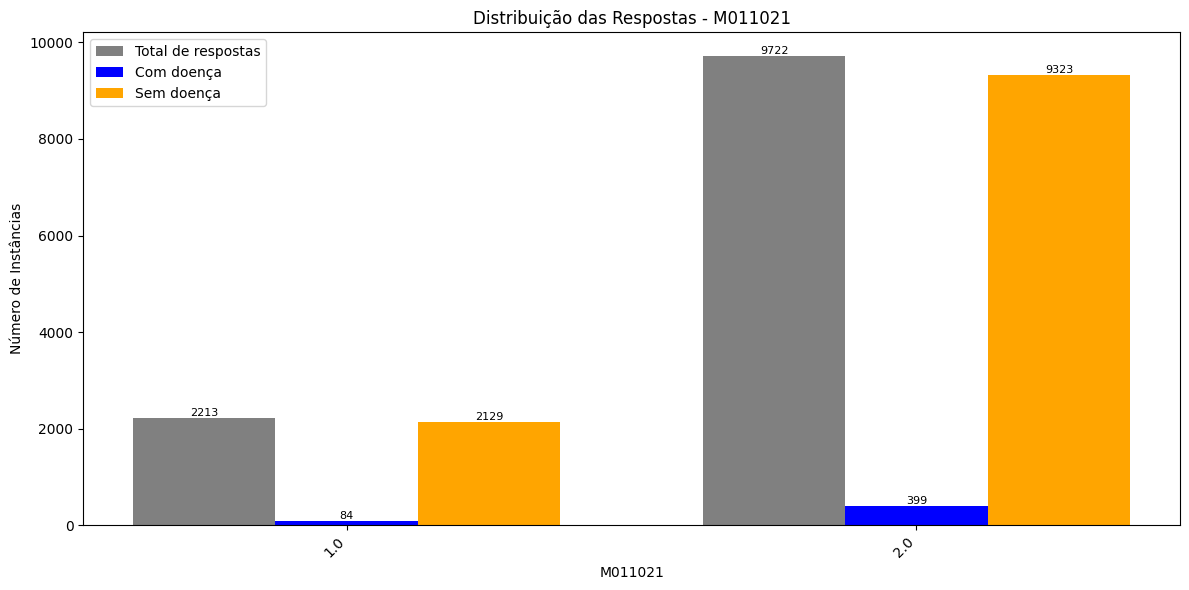

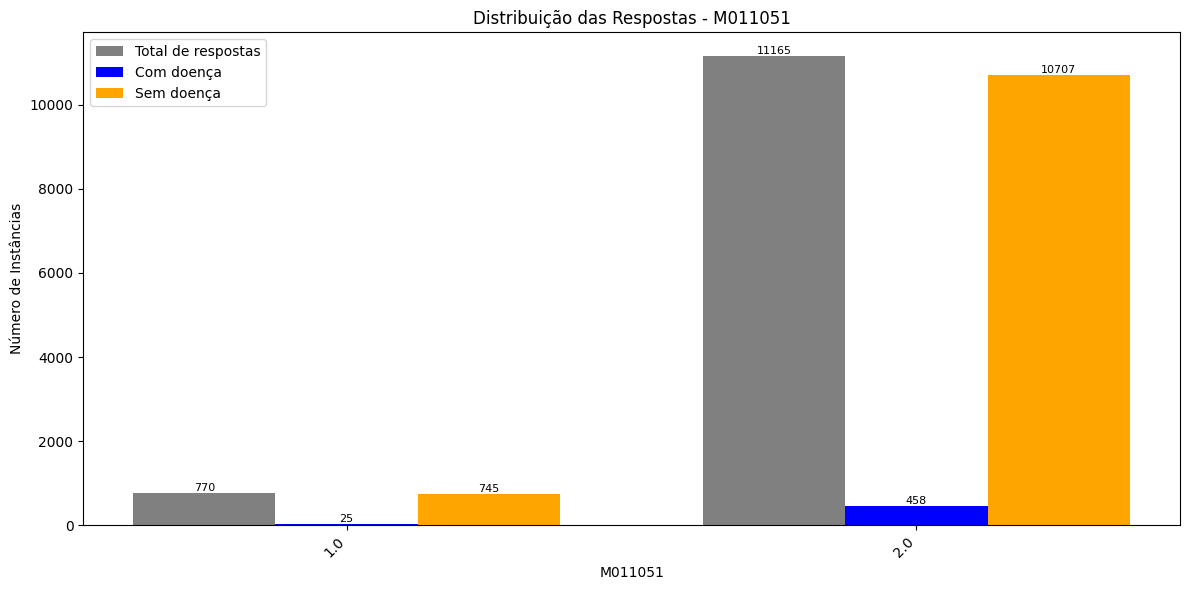

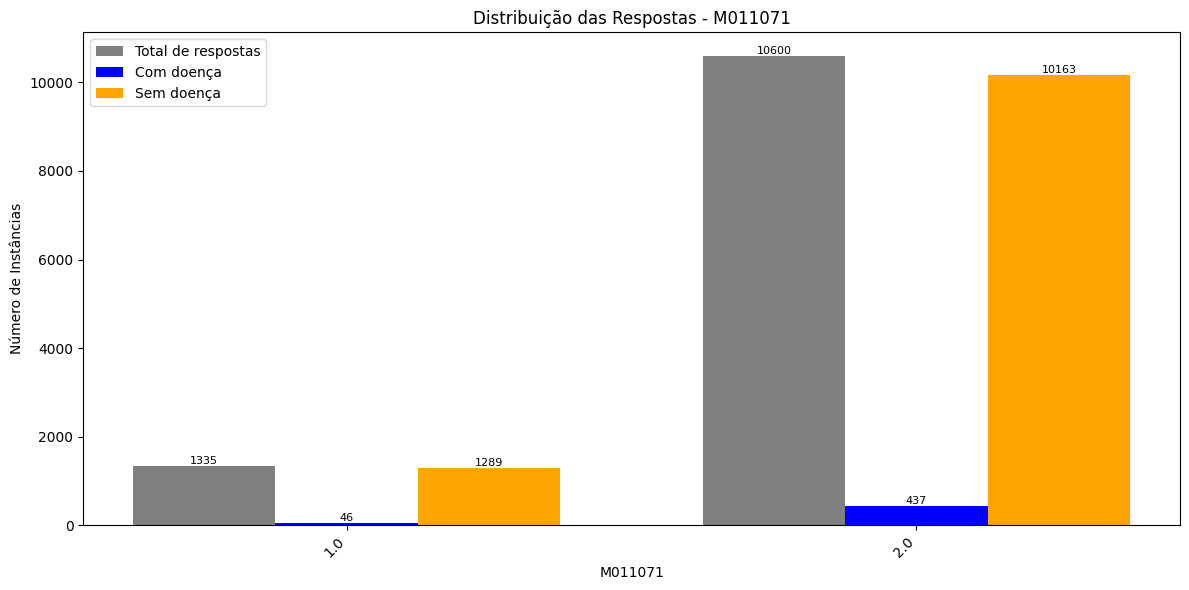

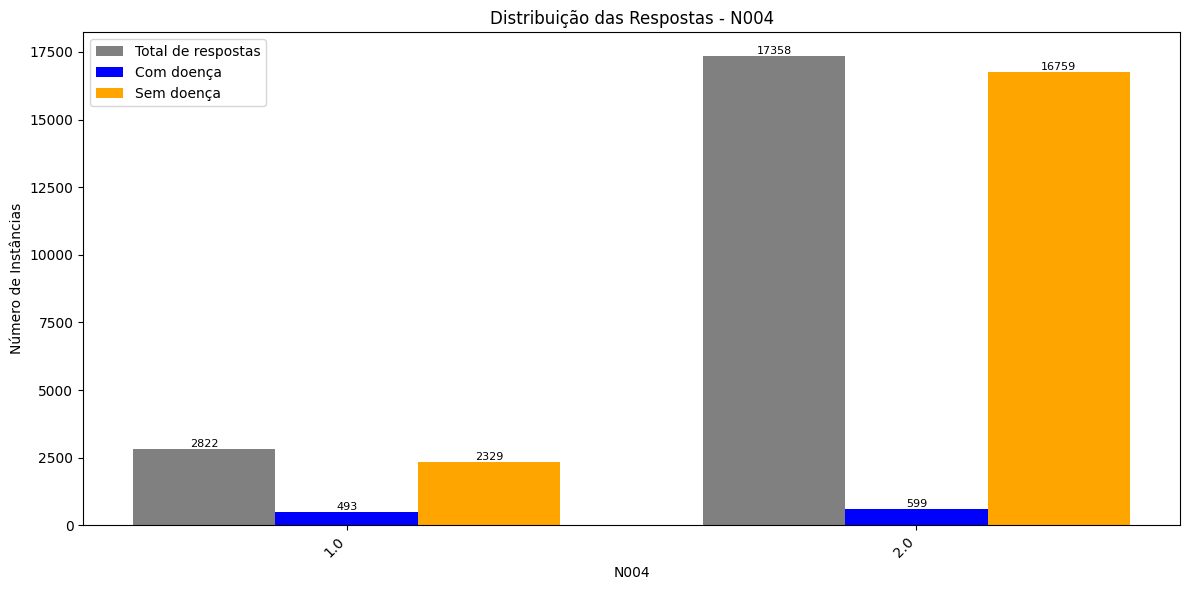

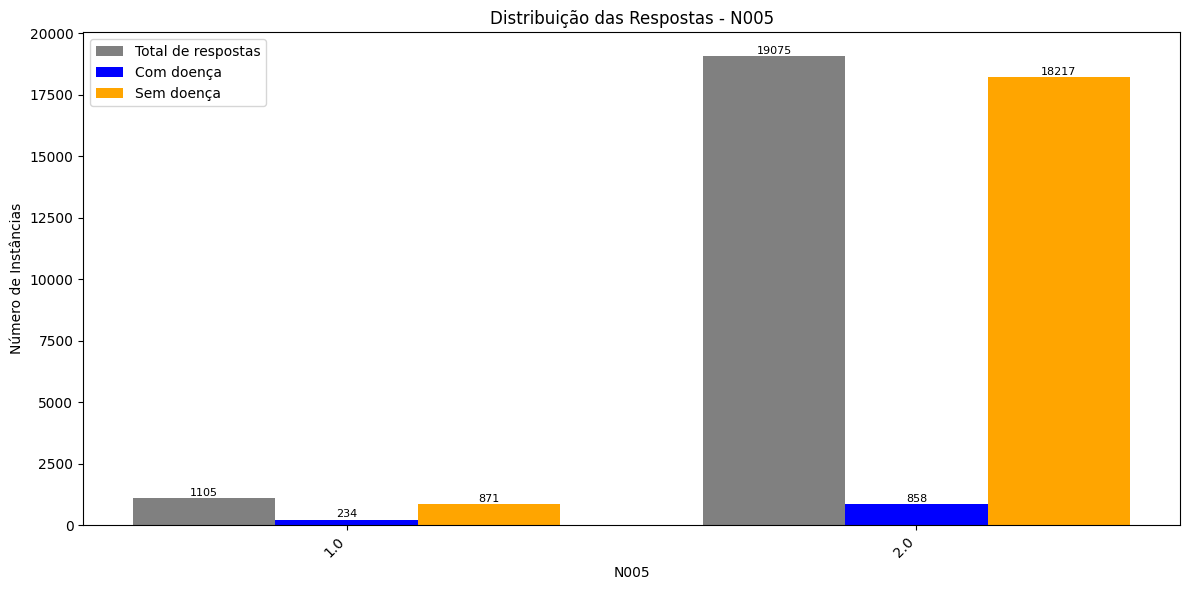

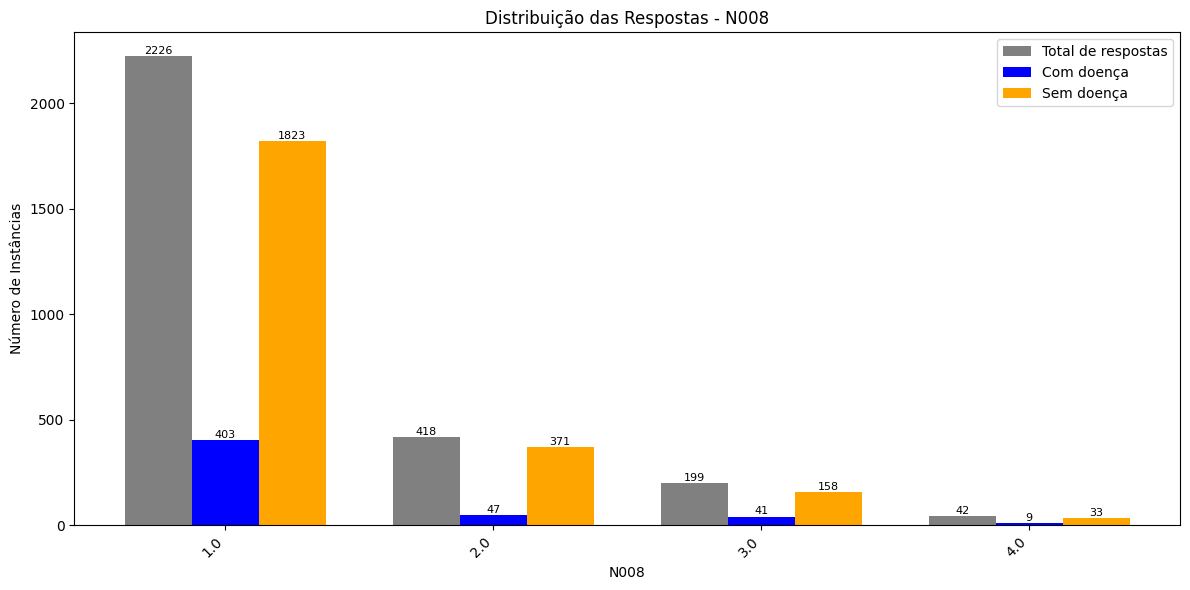

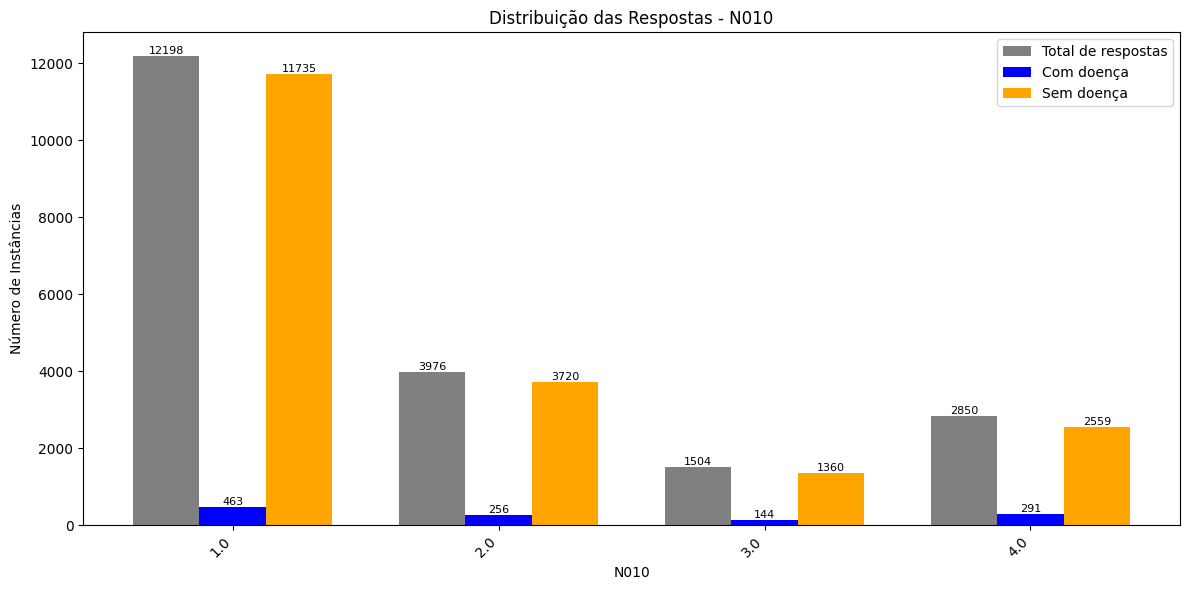

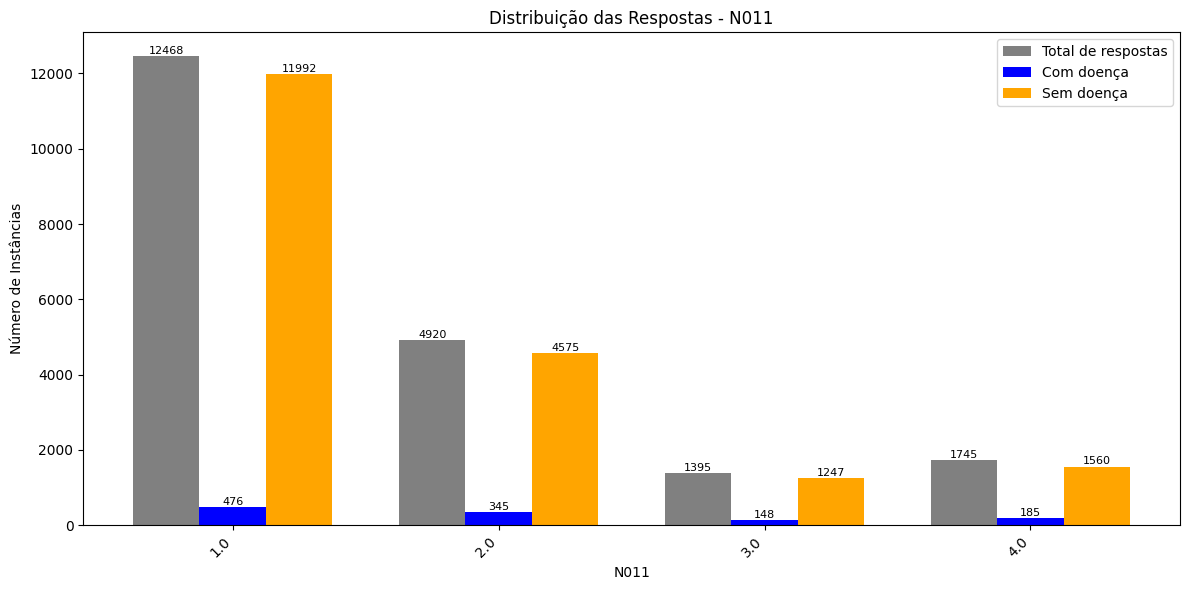

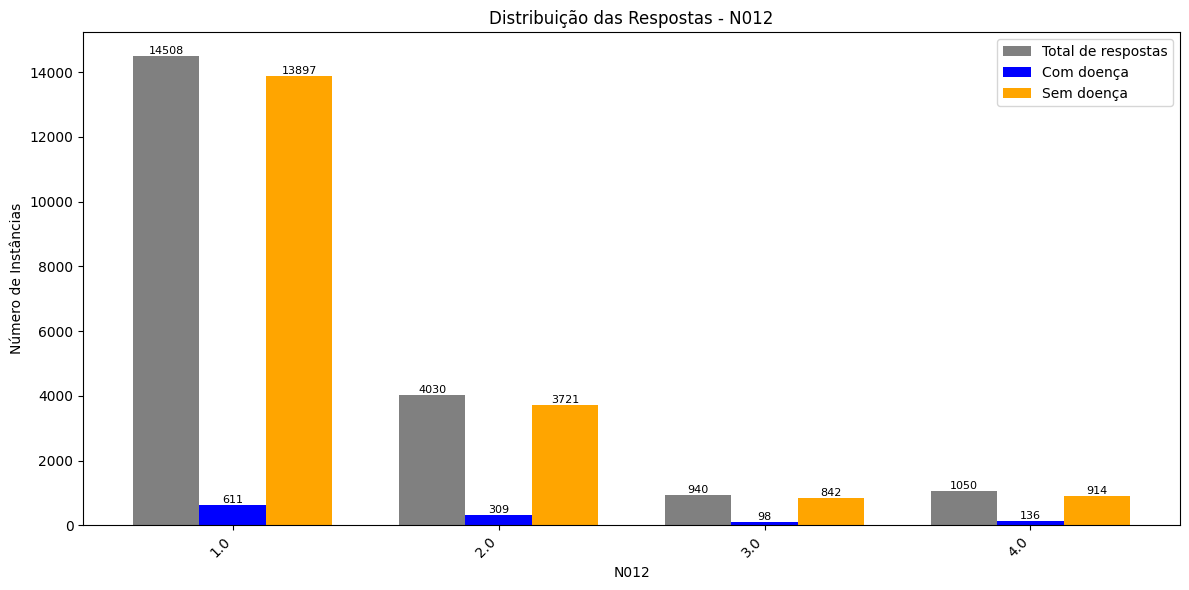

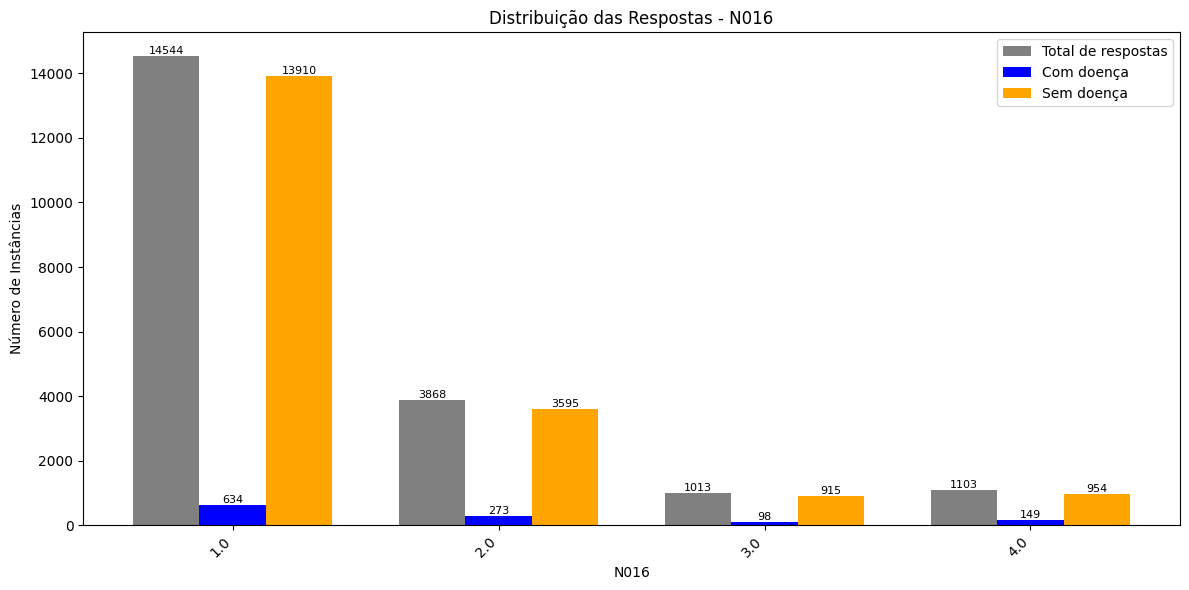

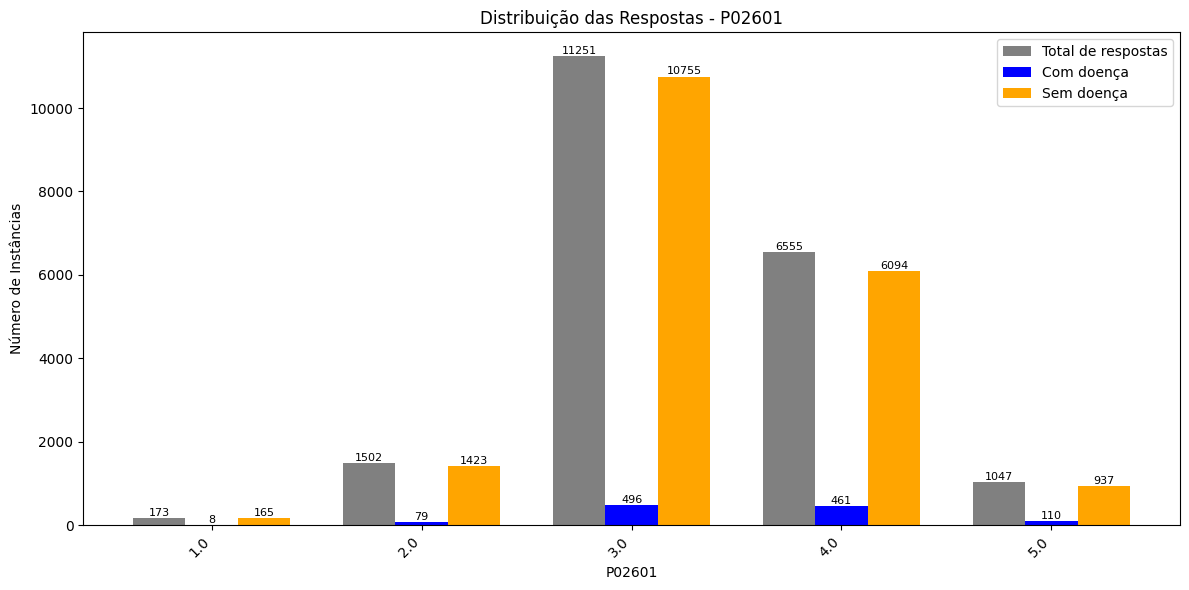

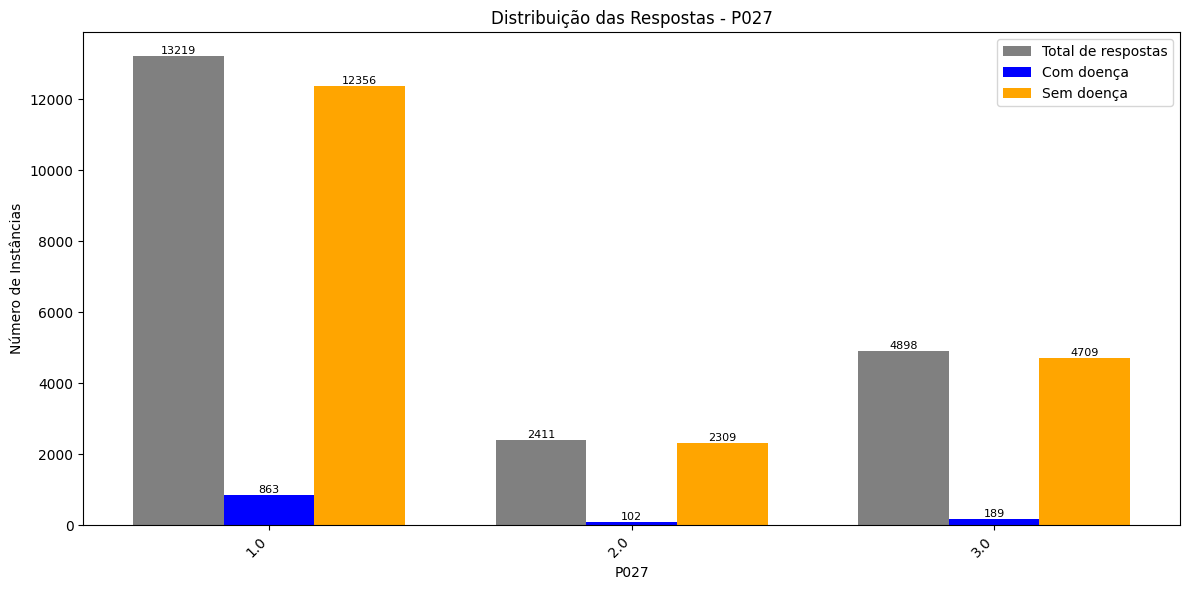

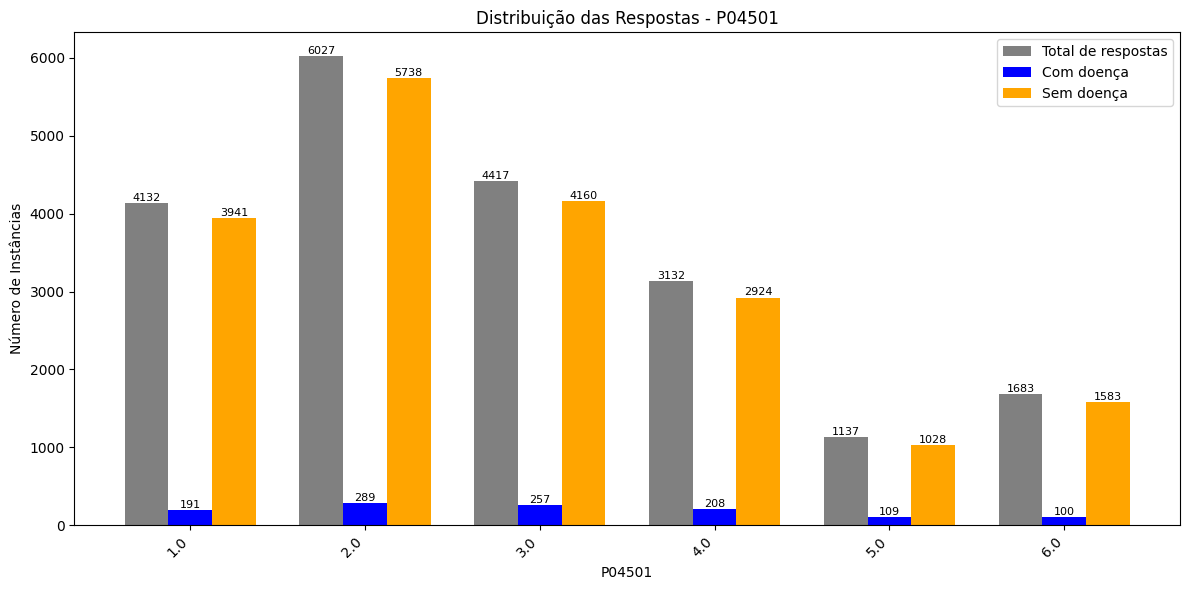

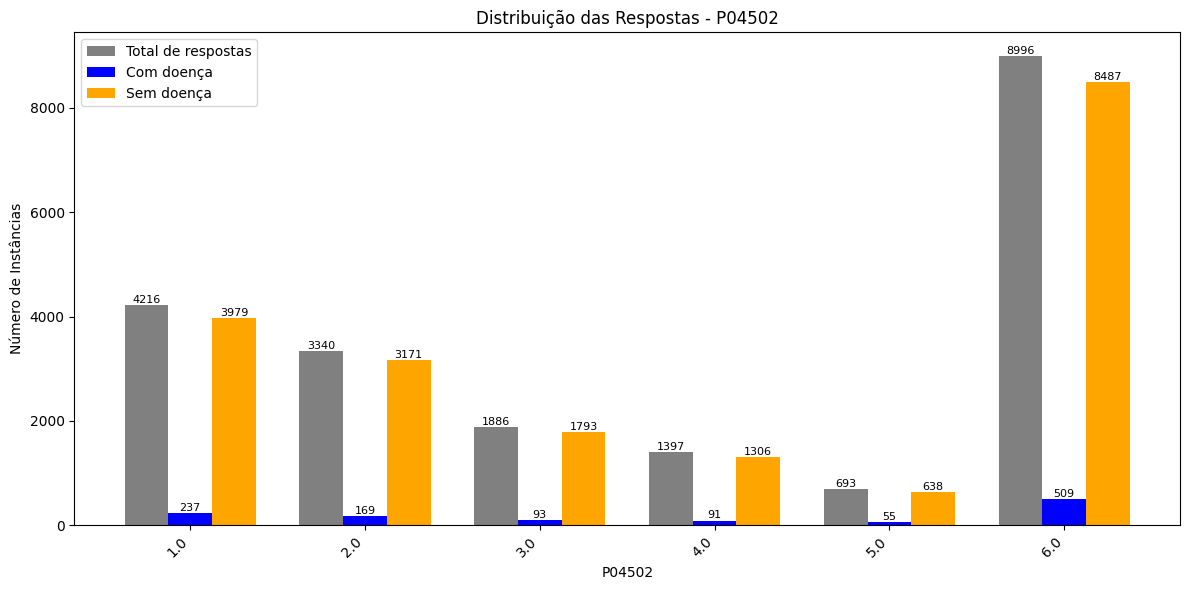

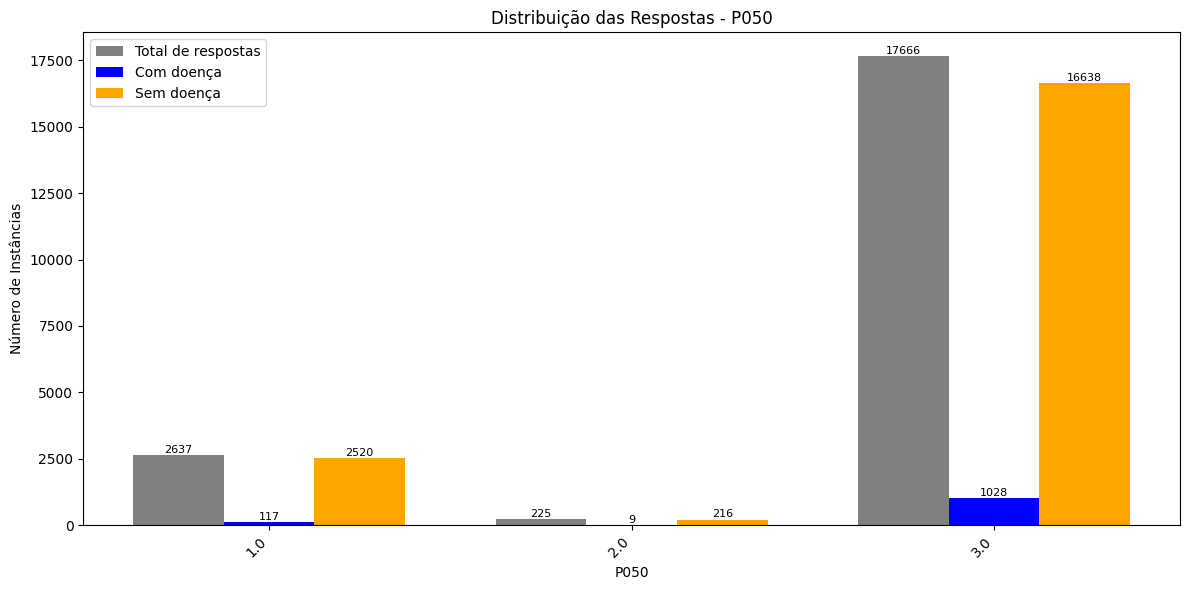

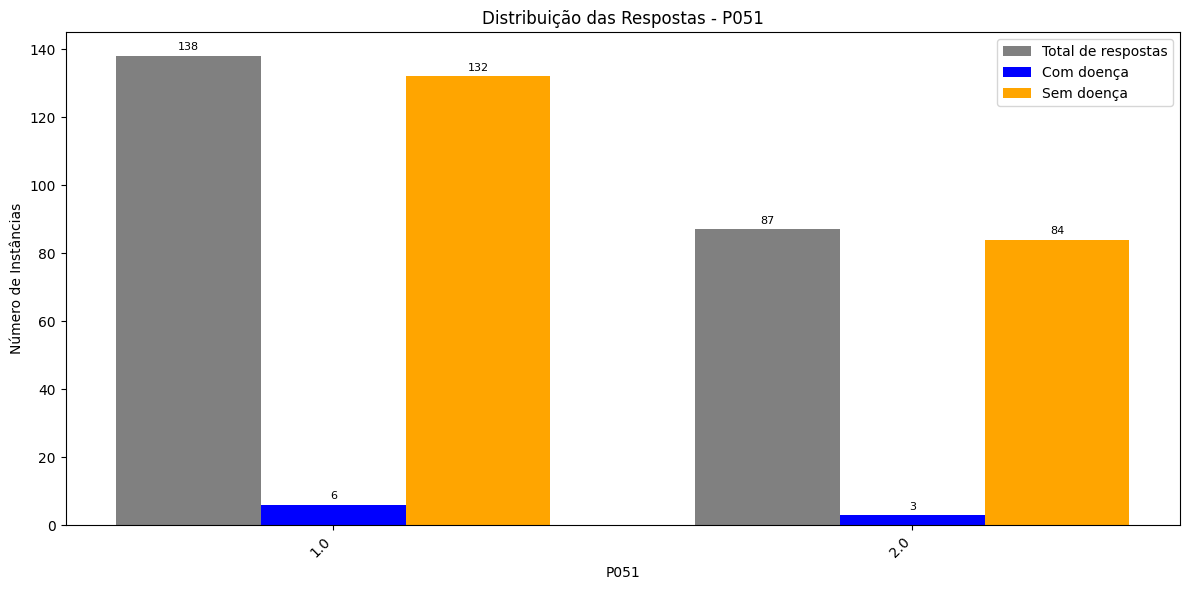

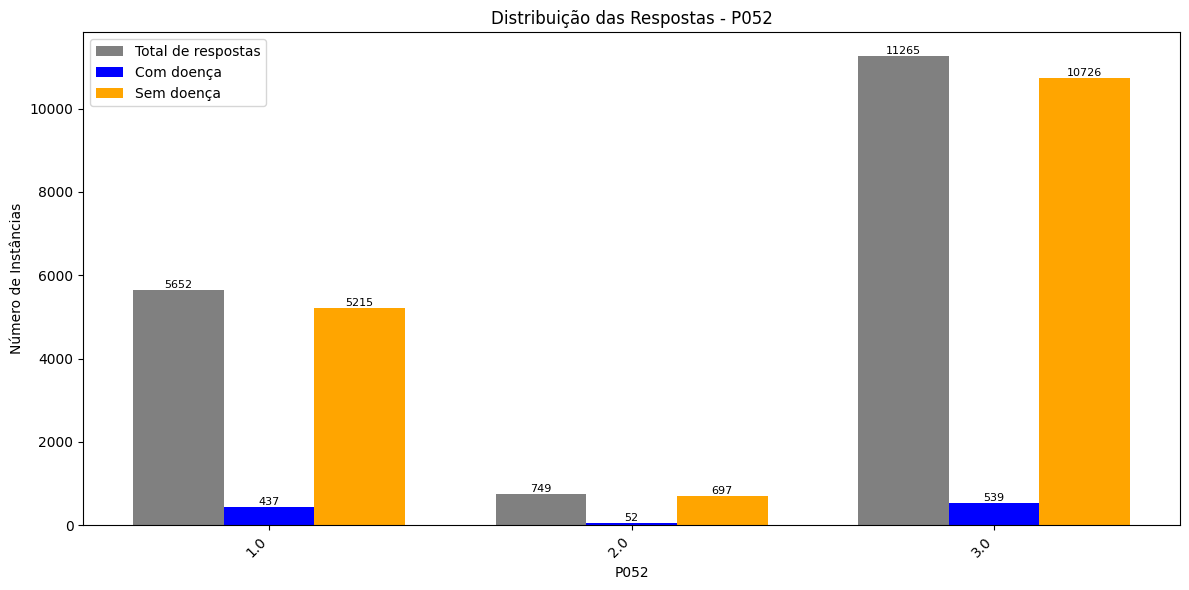

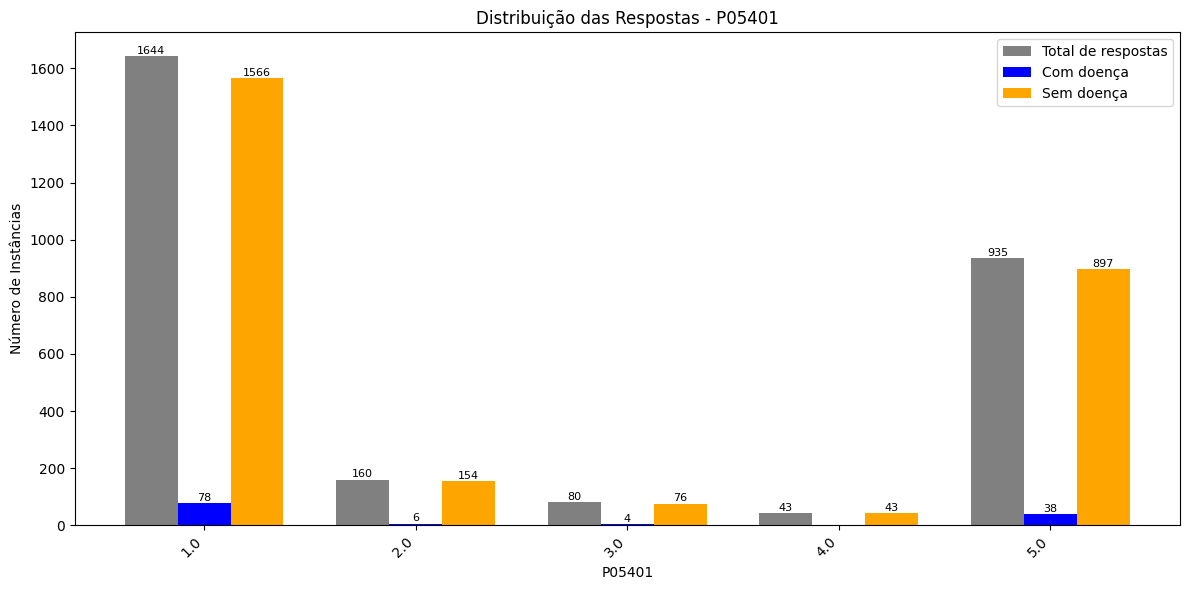

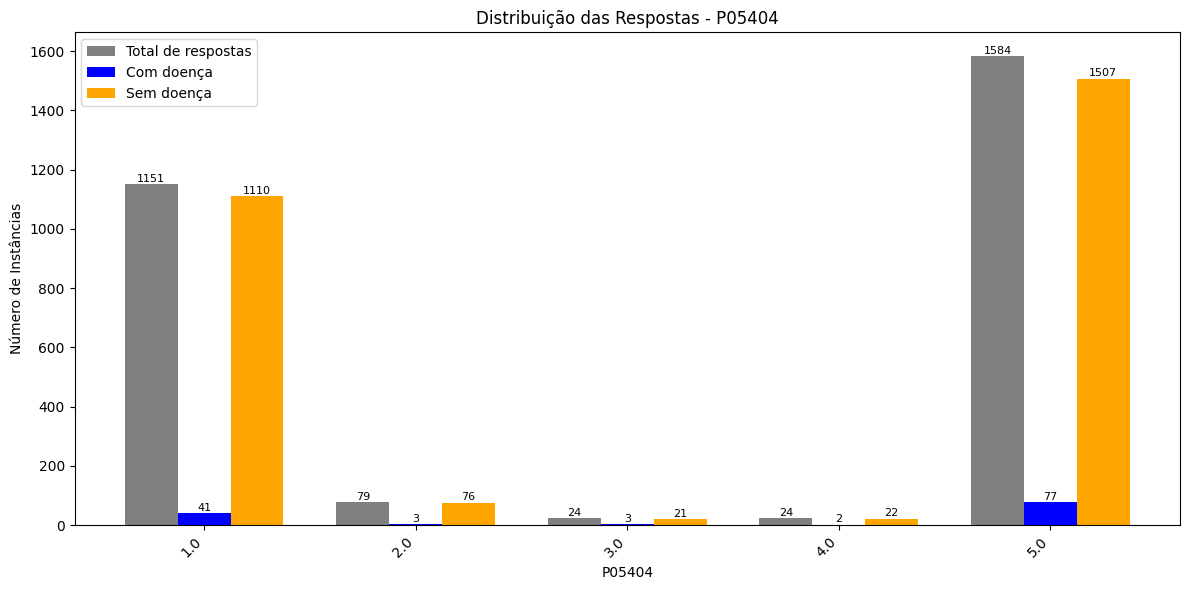

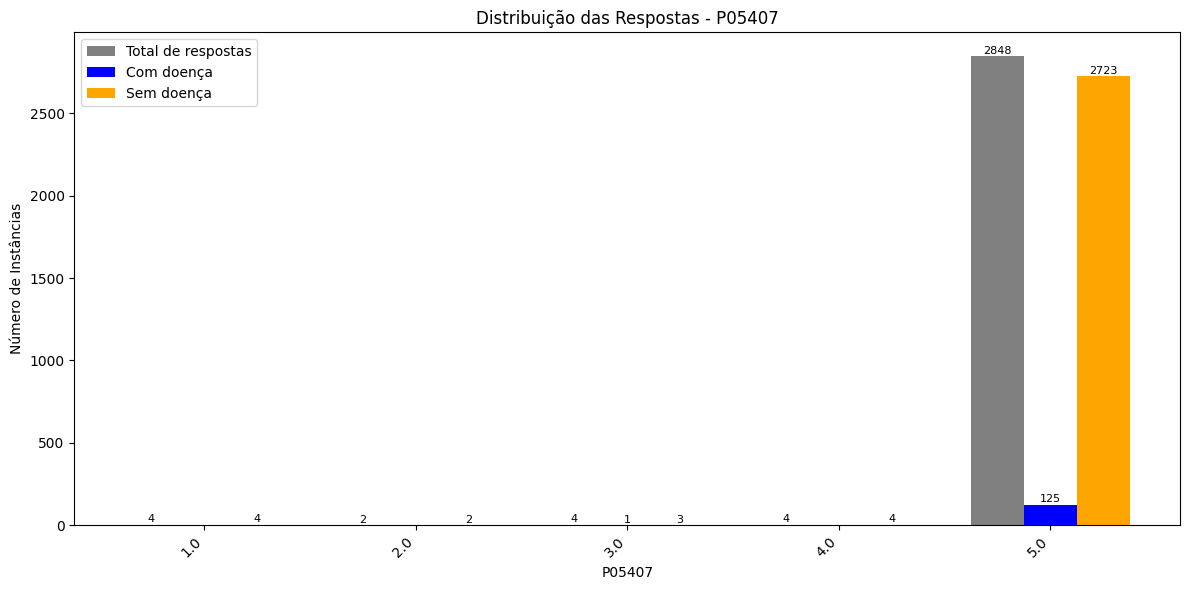

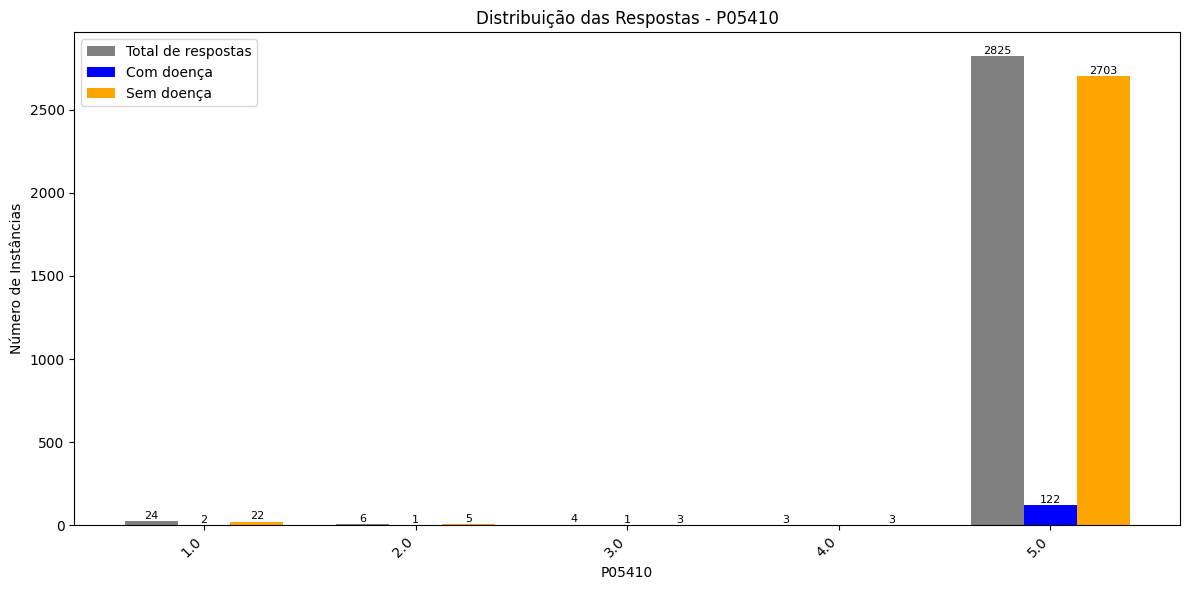

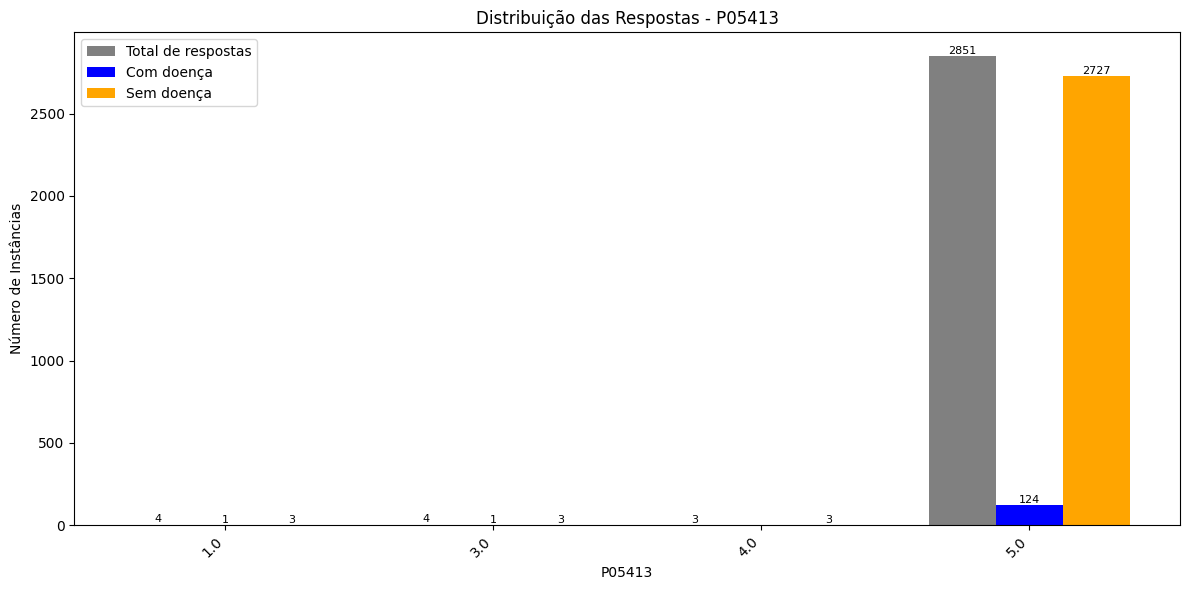

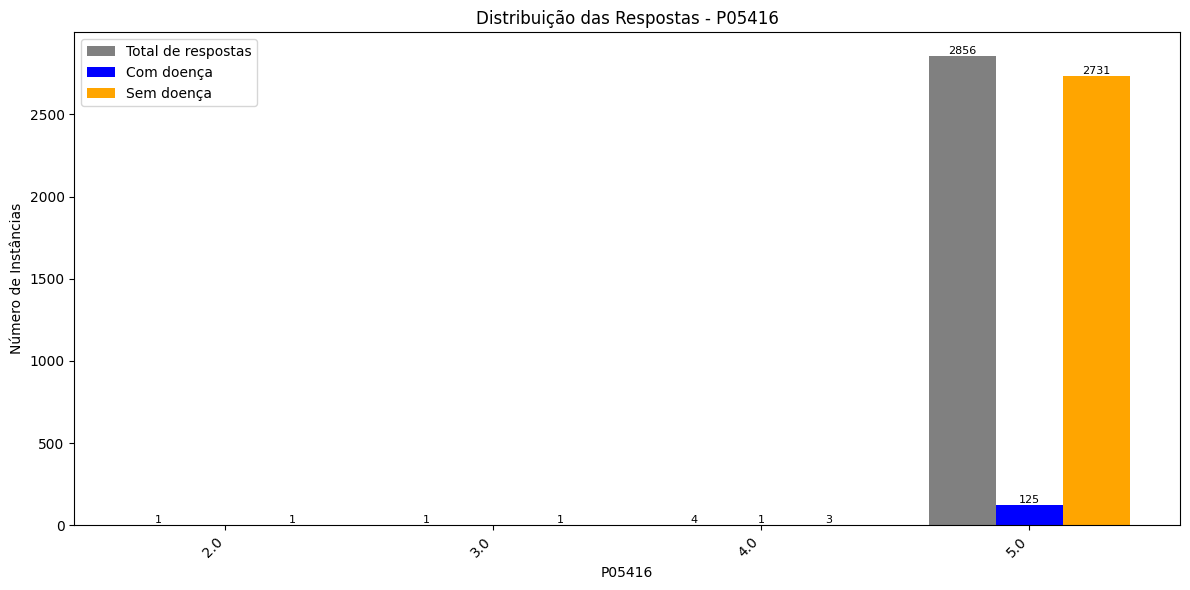

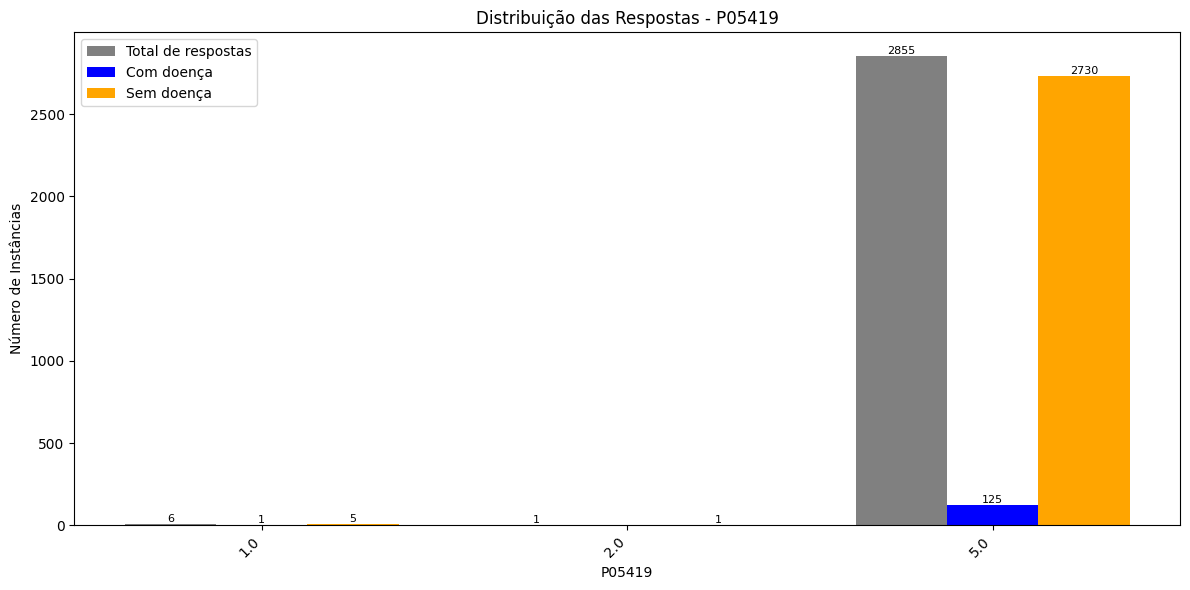

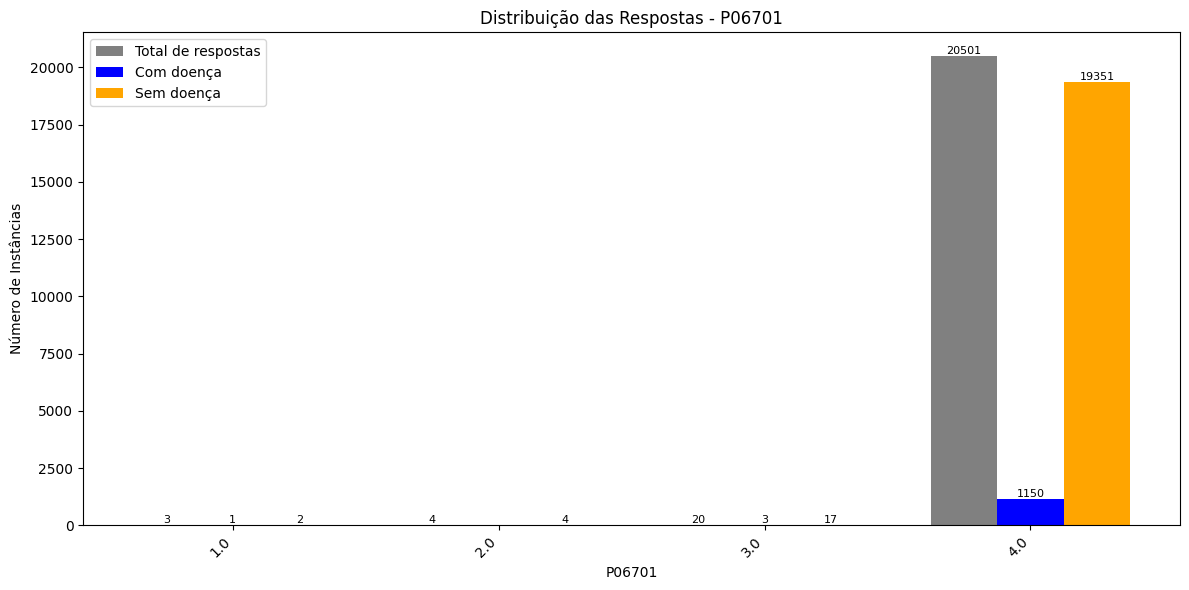

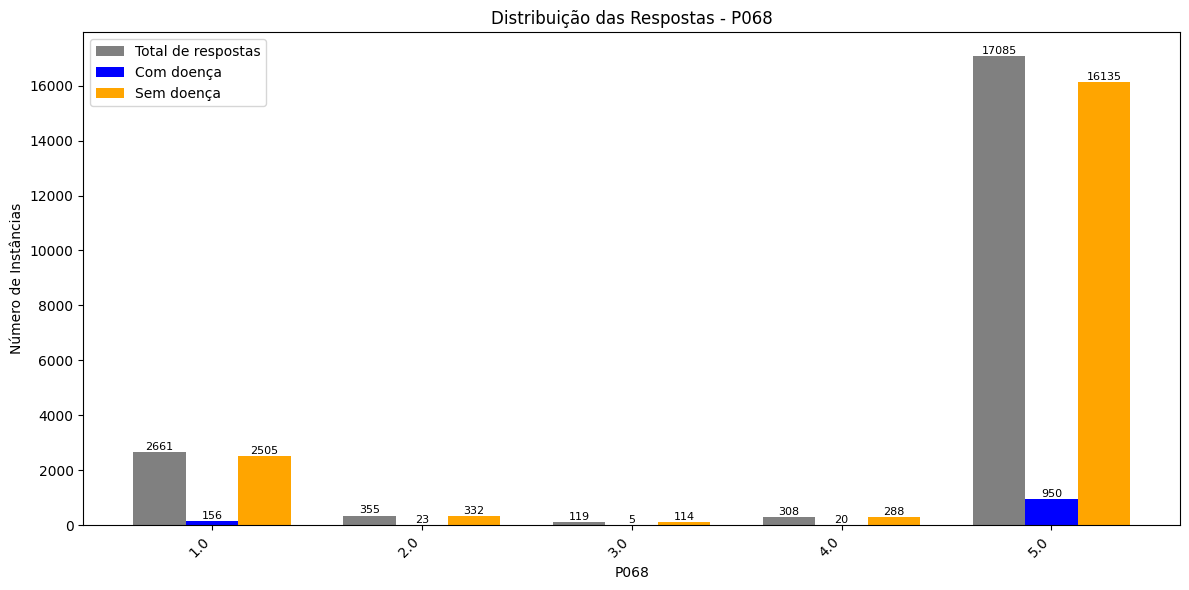

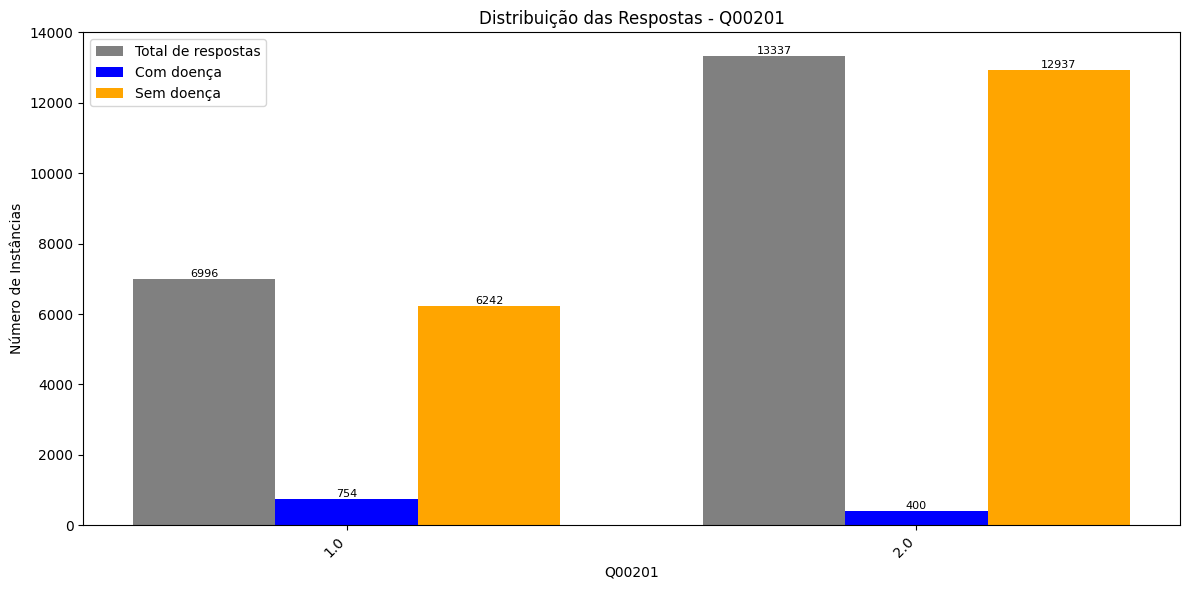

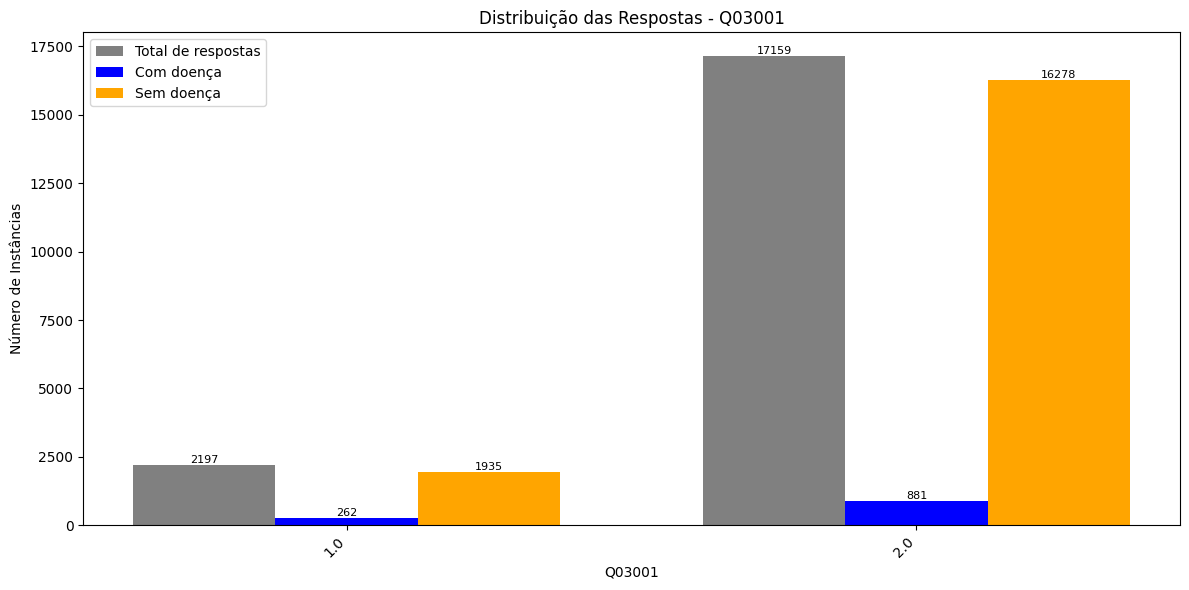

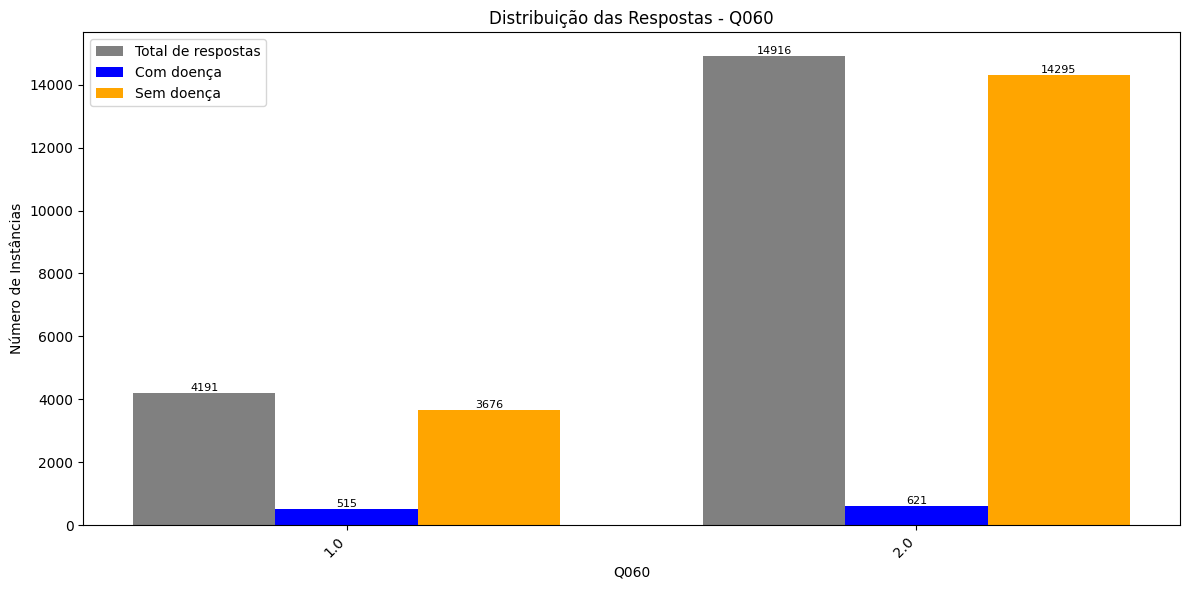

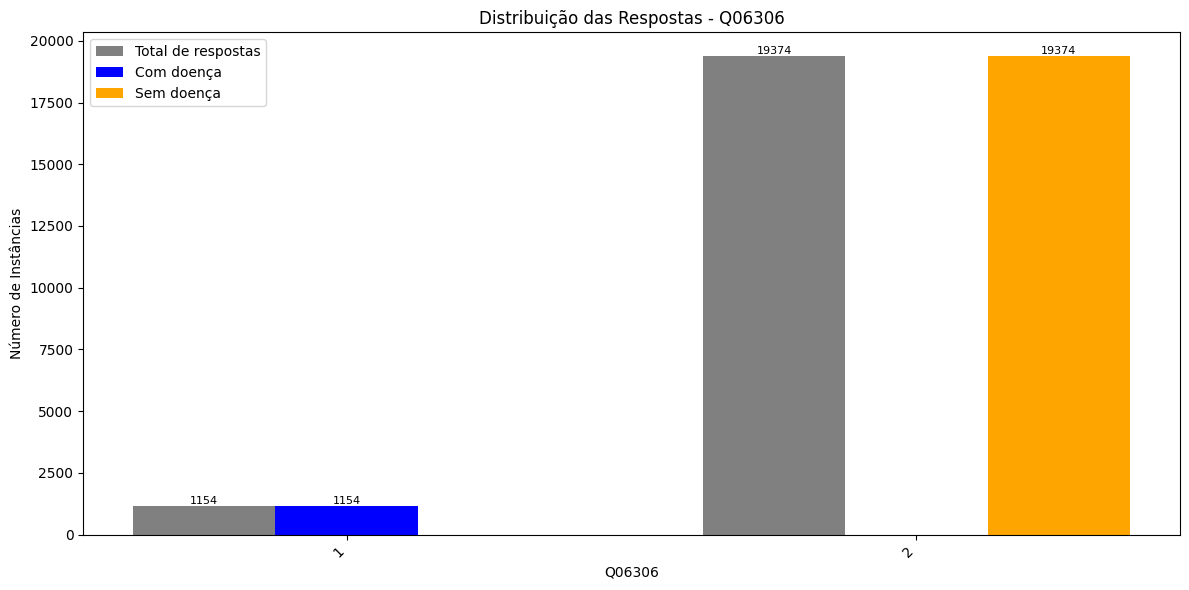

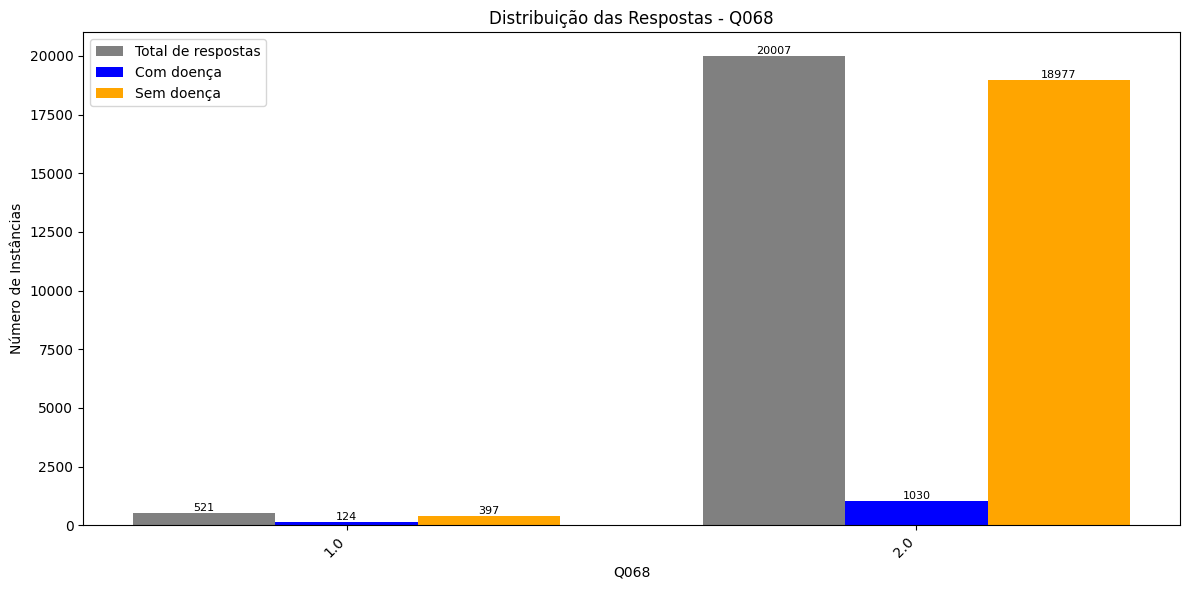

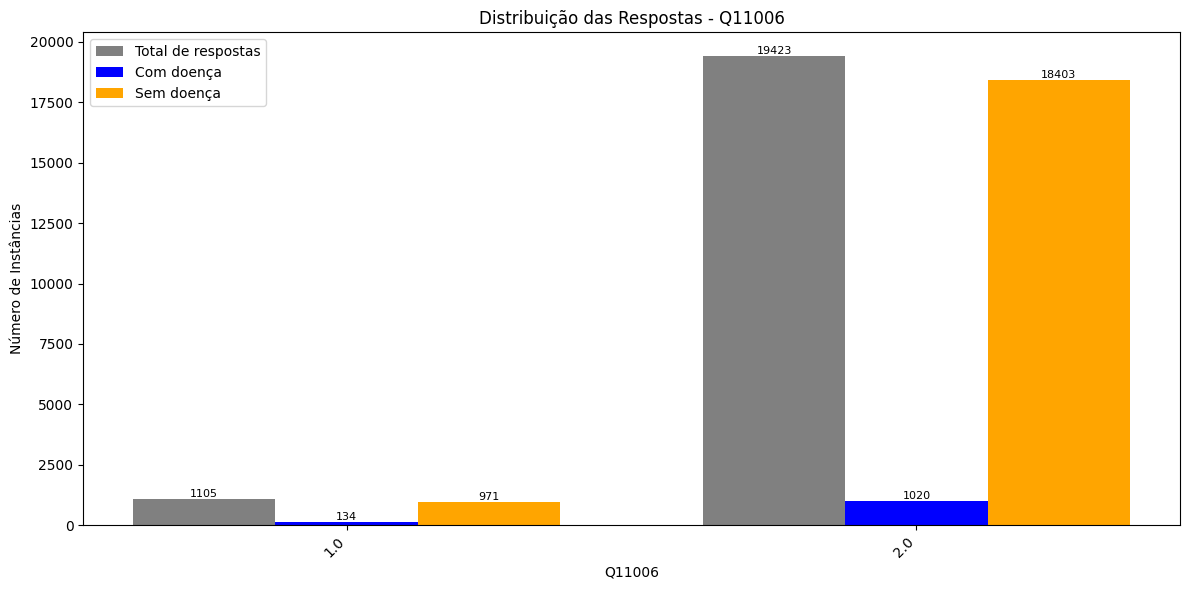

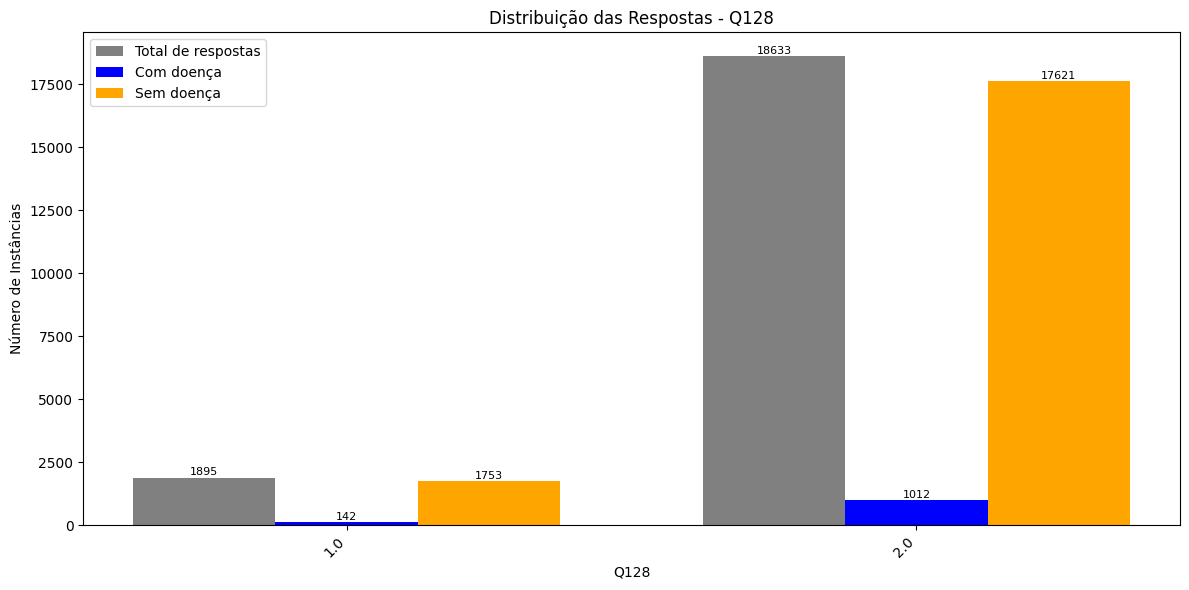

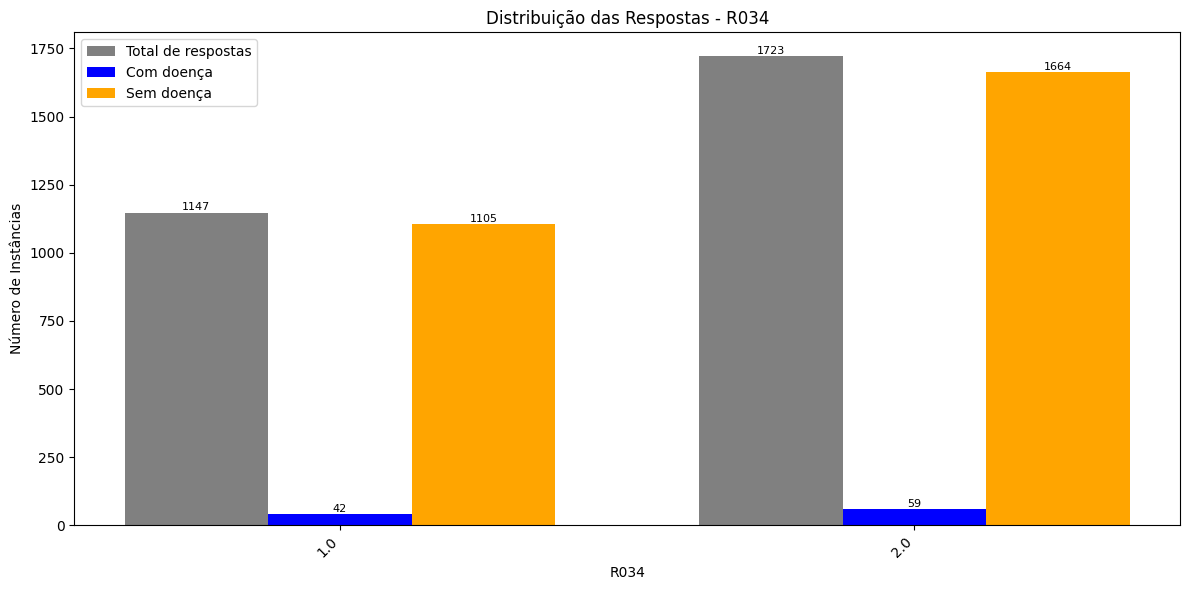

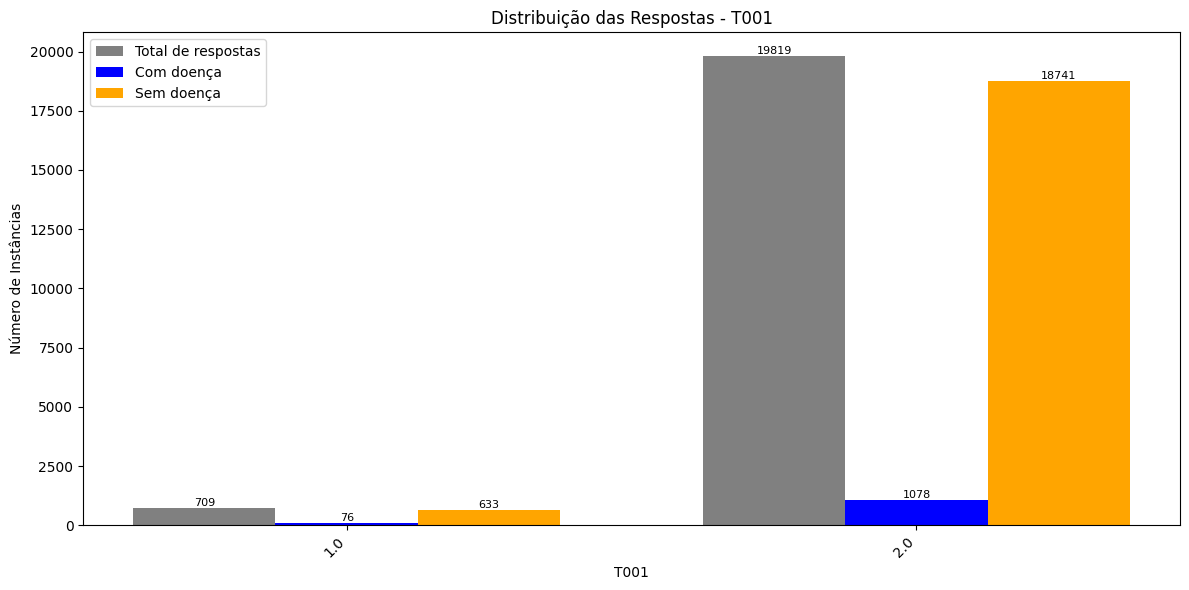

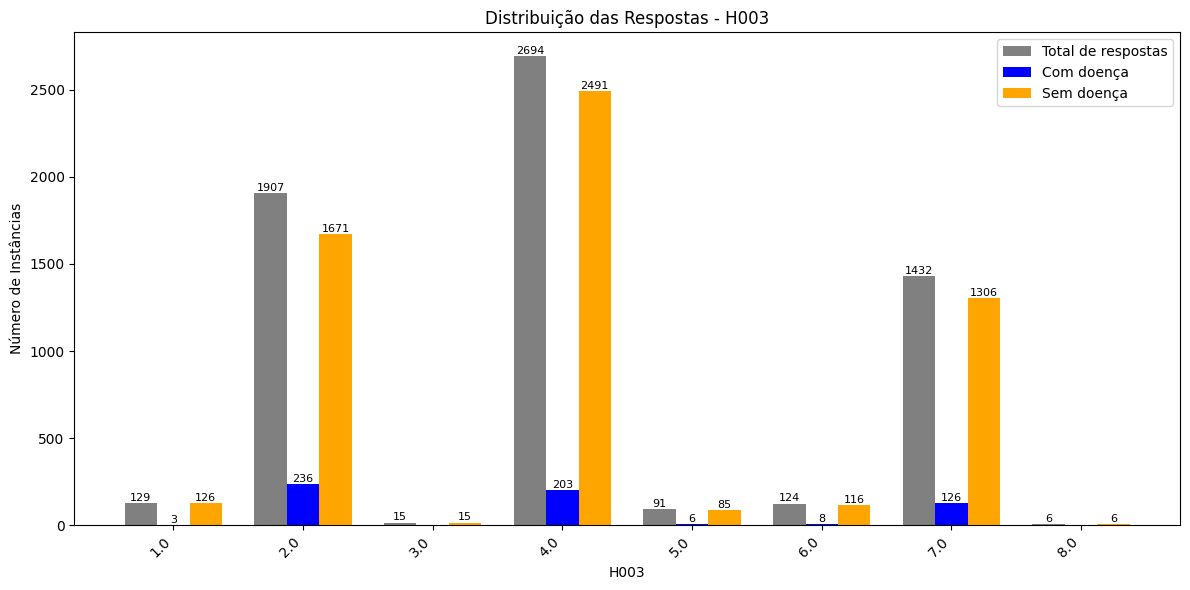

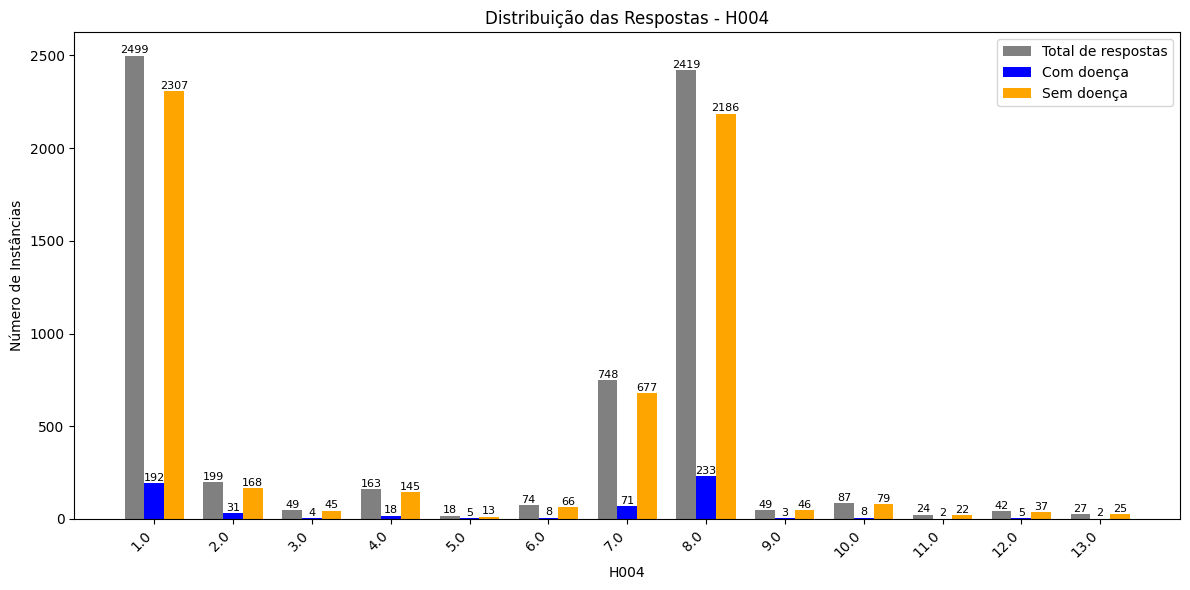

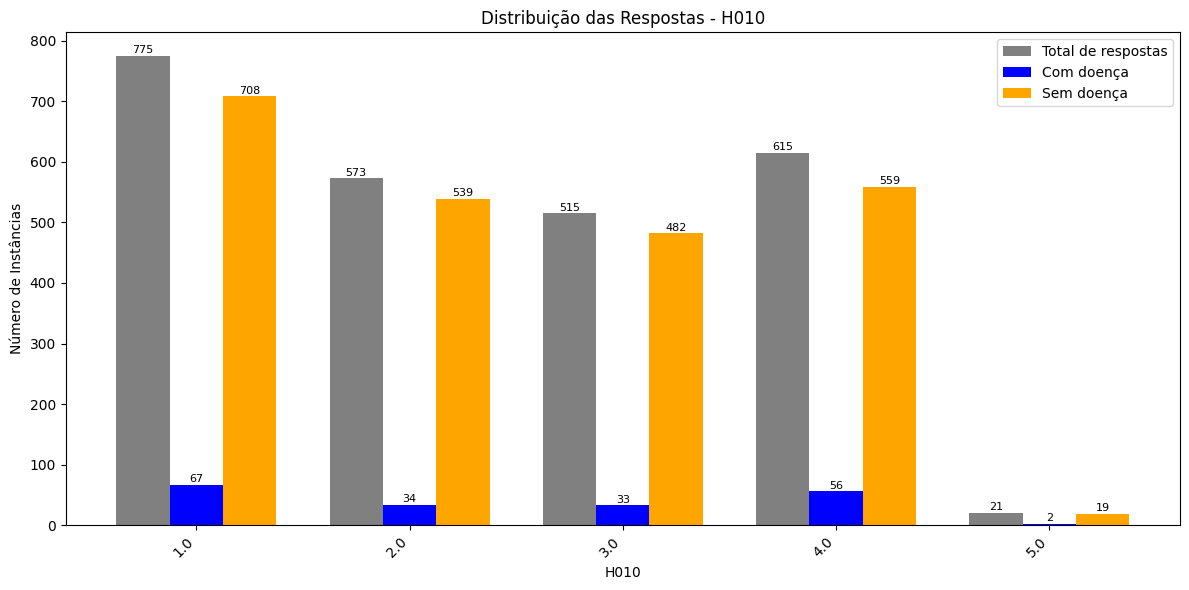

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('..\\Bases\\Criados\\2_base_sem_outliers.csv')  

# Lista de variáveis categóricas
variaveis_categoricas = ['V0001', 'V0026', 'V0031', 'B001', 'C006', 'C009', 'C011', 'D00901', 'D014', 'E006011', 'E008', 
                'F001011', 'F007011', 'F008011', 'VDF001', 'G059', 'G060', 'G062', 
                'I00102', 'I006', 'I004', 'I00401', 'I00402', 'I00403', 'J001', 'J00101', 'J002', 'J00402', 'J00404', 'J007', 'J00801', 'J01101', 
                'M00203', 'M011011', 'M011021', 'M011051', 'M011071', 'N004', 'N005', 'N008', 'N010', 'N011', 'N012', 'N016', 'P02601', 'P027',
                'P04501', 'P04502', 'P050', 'P051', 'P052', 'P05401', 'P05404', 'P05407', 'P05410', 'P05413', 'P05416', 'P05419', 'P06701', 'P068', 
                'Q00201', 'Q03001', 'Q060', 'Q06306', 'Q068', 'Q11006', 'Q128', 'R034', 'T001', 'H003', 'H004', 'H010']

# Filtra somente as classes válidas (1 e 2) e converte para string
df = df[df['Q06306'].isin([1.0, 2.0])]
df['Q06306'] = df['Q06306'].astype(int).astype(str)

# Loop sobre cada variável categórica
for var in variaveis_categoricas:
    if var not in df.columns:
        continue

    total = df[var].value_counts().sort_index()
    classe_1 = df[df['Q06306'] == '1'][var].value_counts().sort_index()
    classe_2 = df[df['Q06306'] == '2'][var].value_counts().sort_index()

    categorias = sorted(set(total.index) | set(classe_1.index) | set(classe_2.index))
    total = total.reindex(categorias, fill_value=0)
    classe_1 = classe_1.reindex(categorias, fill_value=0)
    classe_2 = classe_2.reindex(categorias, fill_value=0)

    x = range(len(categorias))
    width = 0.25

    plt.figure(figsize=(12, 6))
    bars_total = plt.bar([i - width for i in x], total, width=width, label='Total de respostas', color='gray')
    bars_1 = plt.bar(x, classe_1, width=width, label='Com doença', color='blue')
    bars_2 = plt.bar([i + width for i in x], classe_2, width=width, label='Sem doença', color='orange')

    # Adiciona os rótulos com as quantidades exatas em cima das barras
    for bars in [bars_total, bars_1, bars_2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                plt.text(bar.get_x() + bar.get_width()/2, height + 1, str(int(height)), 
                         ha='center', va='bottom', fontsize=8)

    plt.xticks(x, categorias, rotation=45, ha='right')
    plt.xlabel(var)
    plt.ylabel('Número de Instâncias')
    plt.title(f'Distribuição das Respostas - {var}')
    plt.legend()
    plt.tight_layout()
    plt.show()

